In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers.default='notebook'

In [3]:
df = pd.read_csv(os.path.join('male_dataset.csv'))
df = df.drop_duplicates().set_index('ID_REF')
df.head()

,GSM1350858,GSM1350860,GSM1350865,GSM1350866,GSM1350868,GSM1350869,GSM1350872,GSM1350873,GSM1350875,GSM1350880,...,GSM755469,GSM755470,GSM755471,GSM755473,GSM755477,GSM755479,GSM755480,GSM755483,GSM755486,GSM755487
ID_REF,,,,,,,,,,,,,,,,,,,,,
AAAS,374.207203,257.206450,447.928697,398.621033,322.590105,330.528999,397.574676,428.357442,204.923421,377.322358,...,443.163852,431.931477,397.559006,428.382734,409.428499,415.111584,500.032930,442.641416,400.910242,404.599151
ABCB6,91.967985,96.941811,105.935637,94.966608,82.008008,93.885442,78.824640,84.659408,97.450831,93.073666,...,91.827045,92.990306,93.207903,93.861871,89.177066,93.139684,92.076399,91.675315,93.823056,94.620520
ABCC5,120.442872,128.379222,112.781892,108.390052,131.967175,120.516036,143.482240,131.457132,120.619014,129.314896,...,156.915714,142.720596,131.141258,150.504045,155.036561,155.333467,161.955600,134.358367,136.402885,131.806478
ABCC9,27.851002,31.567721,28.671622,30.095596,27.999177,28.859615,31.057313,28.082942,29.509939,27.708063,...,27.426221,28.502031,28.467225,28.422927,28.707700,29.267754,28.229914,28.916534,29.514558,29.375335
ABCE1,454.102141,286.114260,233.138671,141.294704,412.745910,293.924811,389.404285,333.369726,378.508368,285.569146,...,423.544479,394.199787,290.459147,393.548738,473.743095,369.371750,456.639486,330.485117,316.290885,242.776566


In [4]:
df_all_annot = pd.read_csv(os.path.join('meta_data_correct.csv'))
df_all_annot = df_all_annot.drop_duplicates().set_index('GSM')
df_all_annot.head()

,Unnamed: 0,GSE,age,sex
GSM,,,,
GSM418770,1,GSE16717,91,F
GSM418771,2,GSE16717,56,F
GSM418772,3,GSE16717,91,M
GSM418773,4,GSE16717,52,M
GSM418774,5,GSE16717,64,F


In [5]:
subdf = df_all_annot[['age']].join(df[:'AAAS'])
# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(subdf['age'], subdf['AAAS'], color='skyblue')
plt.title('Scatter Plot of Age vs cg00295572')
plt.xlabel('Age')
plt.ylabel('AAAS')
plt.grid(True)
plt.show()

KeyError: 'AAAS'

<Figure size 800x600 with 0 Axes>

In [7]:
subdf_idx = subdf_idx.drop(dupls_in_df)
subdf_annot = subdf_annot.loc[subdf_idx]
subdf = subdf.loc[subdf_idx]
len(subdf) == len(subdf_annot)

NameError: name 'subdf_idx' is not defined

In [8]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
from concurrent.futures import ProcessPoolExecutor

In [9]:
subdf.columns

Index(['age', 'GSM1350858', 'GSM1350860', 'GSM1350865', 'GSM1350866',
       'GSM1350868', 'GSM1350869', 'GSM1350872', 'GSM1350873', 'GSM1350875',
       ...
       'GSM755469', 'GSM755470', 'GSM755471', 'GSM755473', 'GSM755477',
       'GSM755479', 'GSM755480', 'GSM755483', 'GSM755486', 'GSM755487'],
      dtype='object', length=320)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster import hierarchy

In [11]:
df = df.T

In [12]:
df.head(2)

ID_REF,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
GSM1350858,374.207203,91.967985,120.442872,27.851002,454.102141,263.605589,400.684840,175.105255,431.408326,243.569592,...,119.029148,83.411127,17.473726,111.899388,44.663888,421.011180,401.872721,127.870497,122.860759,415.134985
GSM1350860,257.206450,96.941811,128.379222,31.567721,286.114260,290.104439,379.458299,178.508677,410.966062,245.893447,...,132.735244,95.161289,19.318838,98.319673,41.498950,582.440441,392.035032,136.346197,95.100754,377.173482


In [13]:
subdf_idx = df_all_annot.index

In [14]:
idx_in_df = list(df.index)
dupls_in_df = list(set(n for n in idx_in_df if idx_in_df.count(n) > 1))
df.loc[dupls_in_df]

ID_REF,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3


In [15]:
df_all_annot

,Unnamed: 0,GSE,age,sex
GSM,,,,
GSM418770,1,GSE16717,91,F
GSM418771,2,GSE16717,56,F
GSM418772,3,GSE16717,91,M
GSM418773,4,GSE16717,52,M
GSM418774,5,GSE16717,64,F
...,...,...,...,...
GSM1611030,4584,GSE65907,72,M
GSM1611031,4585,GSE65907,67,F
GSM1611032,4586,GSE65907,49,M


In [16]:
df_all_annot = df_all_annot.loc[subdf_idx]
df = df.loc[subdf_idx]
len(df) == len(df_all_annot)

KeyError: '[\'GSM418770\', \'GSM418771\', \'GSM418772\', \'GSM418773\', \'GSM418774\', \'GSM418775\', \'GSM418776\', \'GSM418777\', \'GSM418778\', \'GSM418779\', \'GSM418780\', \'GSM418781\', \'GSM418782\', \'GSM418783\', \'GSM418784\', \'GSM418785\', \'GSM418786\', \'GSM418787\', \'GSM418788\', \'GSM418789\', \'GSM418790\', \'GSM418791\', \'GSM418792\', \'GSM418793\', \'GSM418794\', \'GSM418795\', \'GSM418796\', \'GSM418797\', \'GSM418798\', \'GSM418799\', \'GSM418800\', \'GSM418801\', \'GSM418802\', \'GSM418803\', \'GSM418804\', \'GSM418805\', \'GSM418806\', \'GSM418807\', \'GSM418808\', \'GSM418809\', \'GSM418810\', \'GSM418811\', \'GSM418812\', \'GSM418813\', \'GSM418814\', \'GSM418815\', \'GSM418816\', \'GSM418817\', \'GSM418818\', \'GSM418819\', \'GSM418820\', \'GSM418821\', \'GSM418822\', \'GSM418823\', \'GSM418824\', \'GSM418825\', \'GSM418826\', \'GSM418827\', \'GSM418828\', \'GSM418829\', \'GSM418830\', \'GSM418831\', \'GSM418832\', \'GSM418833\', \'GSM418834\', \'GSM418835\', \'GSM418836\', \'GSM418837\', \'GSM418838\', \'GSM418839\', \'GSM418840\', \'GSM418841\', \'GSM418842\', \'GSM418843\', \'GSM418844\', \'GSM418845\', \'GSM418846\', \'GSM418847\', \'GSM418848\', \'GSM418849\', \'GSM418850\', \'GSM418851\', \'GSM418852\', \'GSM418853\', \'GSM418854\', \'GSM418855\', \'GSM418856\', \'GSM418857\', \'GSM418858\', \'GSM418859\', \'GSM418860\', \'GSM418861\', \'GSM418862\', \'GSM418863\', \'GSM418864\', \'GSM418865\', \'GSM418866\', \'GSM418867\', \'GSM418868\', \'GSM418869\', \'GSM418870\', \'GSM418871\', \'GSM418872\', \'GSM418873\', \'GSM418874\', \'GSM418875\', \'GSM418876\', \'GSM418877\', \'GSM418878\', \'GSM418879\', \'GSM418880\', \'GSM418881\', \'GSM418882\', \'GSM418883\', \'GSM418884\', \'GSM418885\', \'GSM418886\', \'GSM418887\', \'GSM418888\', \'GSM418889\', \'GSM418890\', \'GSM418891\', \'GSM418892\', \'GSM418893\', \'GSM418894\', \'GSM418895\', \'GSM418896\', \'GSM418897\', \'GSM418898\', \'GSM418899\', \'GSM418900\', \'GSM418901\', \'GSM418902\', \'GSM418903\', \'GSM418904\', \'GSM418905\', \'GSM418906\', \'GSM418907\', \'GSM418908\', \'GSM418909\', \'GSM418910\', \'GSM418911\', \'GSM418912\', \'GSM418913\', \'GSM418914\', \'GSM418915\', \'GSM418916\', \'GSM418917\', \'GSM418918\', \'GSM418919\', \'""GSM1642604""\', \'""GSM1642605""\', \'""GSM1642606""\', \'""GSM1642607""\', \'""GSM1642608""\', \'""GSM1642609""\', \'""GSM1642610""\', \'""GSM1642611""\', \'""GSM1642612""\', \'""GSM1642613""\', \'""GSM1642614""\', \'""GSM1642615""\', \'""GSM1642616""\', \'""GSM1642617""\', \'""GSM1642618""\', \'""GSM1642619""\', \'""GSM1642620""\', \'""GSM1642621""\', \'""GSM1642622""\', \'""GSM1642623""\', \'GSM1350856\', \'GSM1350857\', \'GSM1350859\', \'GSM1350861\', \'GSM1350862\', \'GSM1350863\', \'GSM1350864\', \'GSM1350867\', \'GSM1350870\', \'GSM1350871\', \'GSM1350874\', \'GSM1350876\', \'GSM1350877\', \'GSM1350878\', \'GSM1350879\', \'GSM1350882\', \'GSM1350886\', \'GSM1350887\', \'GSM1350894\', \'GSM1350896\', \'GSM1350898\', \'GSM1350900\', \'GSM1350901\', \'GSM1350903\', \'GSM1350906\', \'GSM1350907\', \'GSM1350908\', \'GSM1350910\', \'GSM1350911\', \'GSM1350912\', \'GSM1350913\', \'GSM1350914\', \'GSM1350915\', \'GSM1350917\', \'GSM1350918\', \'GSM1350919\', \'GSM1350921\', \'GSM1350922\', \'GSM1350925\', \'GSM1350926\', \'GSM1350927\', \'GSM1350928\', \'GSM1350929\', \'GSM1350932\', \'GSM1350933\', \'GSM1350934\', \'GSM1350935\', \'GSM1350936\', \'GSM1350939\', \'GSM1350940\', \'GSM1350941\', \'GSM1350942\', \'GSM1350943\', \'GSM1350944\', \'GSM1350945\', \'GSM1350948\', \'GSM1350954\', \'GSM1350958\', \'GSM1350959\', \'GSM1350960\', \'GSM1350961\', \'GSM1350962\', \'GSM1350965\', \'GSM1350966\', \'GSM1350967\', \'GSM1350968\', \'GSM1350970\', \'GSM1350972\', \'GSM1350974\', \'GSM1350975\', \'GSM1350976\', \'GSM1350978\', \'GSM1350980\', \'GSM1350983\', \'GSM1350984\', \'GSM1350985\', \'GSM1350987\', \'GSM1350991\', \'GSM1350992\', \'GSM1350993\', \'GSM1350994\', \'GSM1350995\', \'GSM1350996\', \'GSM1350997\', \'GSM1351002\', \'GSM1351007\', \'GSM1351008\', \'GSM1351009\', \'GSM1351011\', \'GSM1351012\', \'GSM1351013\', \'GSM1351014\', \'GSM1351016\', \'GSM1351019\', \'GSM1351024\', \'GSM1351025\', \'GSM1351026\', \'GSM1351027\', \'GSM1351030\', \'GSM1351031\', \'GSM1351032\', \'GSM1351036\', \'GSM1351037\', \'GSM1351038\', \'GSM1351040\', \'GSM1351042\', \'GSM1351045\', \'GSM1351047\', \'GSM1351048\', \'GSM1351050\', \'GSM1351053\', \'GSM1351055\', \'GSM1351057\', \'GSM1351058\', \'GSM1351059\', \'GSM1351060\', \'GSM1351062\', \'GSM1351063\', \'GSM1351065\', \'GSM1351066\', \'GSM1351068\', \'GSM1351069\', \'GSM1351070\', \'GSM1351071\', \'GSM1351074\', \'GSM1351075\', \'GSM1351077\', \'GSM1351080\', \'GSM1351081\', \'GSM1351082\', \'GSM1351083\', \'GSM1351085\', \'GSM1351086\', \'GSM1351087\', \'GSM1351089\', \'GSM1351090\', \'GSM1351091\', \'GSM1351094\', \'GSM1351095\', \'GSM1351096\', \'GSM1351101\', \'GSM1351103\', \'GSM1351104\', \'GSM1351105\', \'GSM1351109\', \'GSM1351111\', \'GSM1351112\', \'GSM1351113\', \'GSM1351114\', \'GSM1351115\', \'GSM1351117\', \'GSM1351118\', \'GSM1351119\', \'GSM1351121\', \'GSM1351123\', \'GSM1351124\', \'GSM1351125\', \'GSM1351126\', \'GSM1351127\', \'GSM1351129\', \'GSM1351130\', \'GSM1351131\', \'GSM1351132\', \'GSM1351133\', \'GSM1351134\', \'GSM1351135\', \'GSM1351138\', \'GSM1351139\', \'GSM1351140\', \'GSM1351141\', \'GSM1351143\', \'GSM1351145\', \'GSM1351147\', \'GSM1351148\', \'GSM1351150\', \'GSM1351151\', \'GSM1351153\', \'GSM1351154\', \'GSM1351155\', \'GSM1351156\', \'GSM1351157\', \'GSM1351158\', \'GSM1351160\', \'GSM1351161\', \'GSM1351163\', \'GSM1351169\', \'GSM1351170\', \'GSM1351171\', \'GSM1351172\', \'GSM1351174\', \'GSM1351177\', \'GSM1351178\', \'GSM1351180\', \'GSM1351181\', \'GSM1351182\', \'GSM1351185\', \'GSM1351186\', \'GSM1351187\', \'GSM1351188\', \'GSM1351193\', \'GSM1351194\', \'GSM1351195\', \'GSM1351196\', \'GSM1351197\', \'GSM1351198\', \'GSM1351200\', \'GSM1351201\', \'GSM1351203\', \'GSM1351206\', \'GSM1351207\', \'GSM1351208\', \'GSM1351209\', \'GSM1351210\', \'GSM1351211\', \'GSM1351212\', \'GSM1351213\', \'GSM1351219\', \'GSM1351220\', \'GSM1351221\', \'GSM1351222\', \'GSM1351223\', \'GSM1351224\', \'GSM1351225\', \'GSM1351228\', \'GSM1351229\', \'GSM1351230\', \'GSM1351231\', \'GSM1351233\', \'GSM1351236\', \'GSM1351238\', \'GSM1351239\', \'GSM1351241\', \'GSM1351244\', \'GSM1351245\', \'GSM1351249\', \'GSM1351250\', \'GSM1351251\', \'GSM1351253\', \'GSM1351254\', \'GSM1351255\', \'GSM1351258\', \'GSM1351259\', \'GSM1351260\', \'GSM1351262\', \'GSM1351263\', \'GSM1351265\', \'GSM1351269\', \'GSM1351273\', \'GSM1351274\', \'GSM1351276\', \'GSM1351278\', \'GSM1351279\', \'GSM1351282\', \'GSM1351284\', \'GSM1351287\', \'GSM1351288\', \'GSM1351289\', \'GSM1351291\', \'GSM1351292\', \'GSM1351294\', \'GSM1351296\', \'GSM1351299\', \'GSM1351300\', \'GSM1351302\', \'GSM1351304\', \'GSM1351305\', \'GSM1351306\', \'GSM1351307\', \'GSM1351308\', \'GSM1355823\', \'GSM1355825\', \'GSM1355826\', \'GSM1355827\', \'GSM1355828\', \'GSM1355830\', \'GSM1355832\', \'GSM1355833\', \'GSM1355834\', \'GSM1355835\', \'GSM1355836\', \'GSM1355837\', \'GSM1355838\', \'GSM1355841\', \'GSM1355843\', \'GSM1355844\', \'GSM1355845\', \'GSM1355848\', \'GSM1355849\', \'GSM1355850\', \'GSM1355853\', \'GSM1355854\', \'GSM1355861\', \'GSM1355862\', \'GSM1355864\', \'GSM1352002\', \'GSM1352003\', \'GSM1352004\', \'GSM1352005\', \'GSM1352006\', \'GSM1352007\', \'GSM1352008\', \'GSM1352009\', \'GSM1352010\', \'GSM1352011\', \'GSM1352012\', \'GSM1352013\', \'GSM1352014\', \'GSM1352015\', \'GSM1352016\', \'GSM1352017\', \'GSM1352018\', \'GSM1352019\', \'GSM1352020\', \'GSM1352021\', \'GSM1352022\', \'GSM1352023\', \'GSM1352024\', \'GSM1352025\', \'GSM1352026\', \'GSM1352027\', \'GSM1352028\', \'GSM1352029\', \'GSM1352030\', \'GSM1352031\', \'GSM1352032\', \'GSM1352033\', \'GSM1352034\', \'GSM1352035\', \'GSM1352036\', \'GSM1352037\', \'GSM1352038\', \'GSM1352039\', \'GSM1352040\', \'GSM1352041\', \'GSM1352042\', \'GSM1352043\', \'GSM1352044\', \'GSM1352045\', \'GSM1352046\', \'GSM1352047\', \'GSM1352048\', \'GSM1352049\', \'GSM1352050\', \'GSM1352051\', \'GSM1352052\', \'GSM1352053\', \'GSM1352054\', \'GSM1352055\', \'GSM1352056\', \'GSM1352057\', \'GSM1352058\', \'GSM1352059\', \'GSM1352060\', \'GSM1352061\', \'GSM1352062\', \'GSM1352063\', \'GSM1352064\', \'GSM1352065\', \'GSM1352066\', \'GSM1352067\', \'GSM1352068\', \'GSM1352069\', \'GSM1352070\', \'GSM1352071\', \'GSM1352072\', \'GSM1352073\', \'GSM1352074\', \'GSM1352075\', \'GSM1352076\', \'GSM1352077\', \'GSM1352078\', \'GSM1352079\', \'GSM1352080\', \'GSM1352081\', \'GSM1352082\', \'GSM1352083\', \'GSM1352084\', \'GSM1352085\', \'GSM1352086\', \'GSM1352087\', \'GSM1352088\', \'GSM1352089\', \'GSM1352090\', \'GSM1352091\', \'GSM1352092\', \'GSM1352093\', \'GSM1352094\', \'GSM1352095\', \'GSM1352096\', \'GSM1352097\', \'GSM1352098\', \'GSM1352099\', \'GSM1352100\', \'GSM1352101\', \'GSM1352102\', \'GSM1352103\', \'GSM1352104\', \'GSM1352105\', \'GSM1352106\', \'GSM1352107\', \'GSM1352108\', \'GSM1352109\', \'GSM1352110\', \'GSM1352111\', \'GSM1352112\', \'GSM1352113\', \'GSM1352114\', \'GSM1352115\', \'GSM1352116\', \'GSM1352117\', \'GSM1352118\', \'GSM1352119\', \'GSM1352120\', \'GSM1352121\', \'GSM1352122\', \'GSM1352123\', \'GSM1352124\', \'GSM1352125\', \'GSM1352126\', \'GSM1352127\', \'GSM1352128\', \'GSM1352129\', \'GSM1352130\', \'GSM1352131\', \'GSM1352132\', \'GSM1352133\', \'GSM1352134\', \'GSM1352135\', \'GSM1352136\', \'GSM1352137\', \'GSM1352138\', \'GSM1352139\', \'GSM1352140\', \'GSM1352141\', \'GSM1352142\', \'GSM1352143\', \'GSM1352144\', \'GSM1352145\', \'GSM1352146\', \'GSM1352147\', \'GSM1352148\', \'GSM1352149\', \'GSM1352150\', \'GSM1352151\', \'GSM1352152\', \'GSM1352153\', \'GSM1352154\', \'GSM1352155\', \'GSM1352156\', \'GSM1352157\', \'GSM1352158\', \'GSM1352159\', \'GSM1352160\', \'GSM1352161\', \'GSM1352162\', \'GSM1352163\', \'GSM1352164\', \'GSM1352165\', \'GSM1352166\', \'GSM1352167\', \'GSM1352168\', \'GSM1352169\', \'GSM1352170\', \'GSM1352171\', \'GSM1352172\', \'GSM1352173\', \'GSM1352174\', \'GSM1352175\', \'GSM1352176\', \'GSM1352177\', \'GSM1352178\', \'GSM1352179\', \'GSM1352180\', \'GSM1352181\', \'GSM1352182\', \'GSM1352183\', \'GSM1352184\', \'GSM1352185\', \'GSM1352186\', \'GSM1352187\', \'GSM1352188\', \'GSM1352189\', \'GSM1352190\', \'GSM1352191\', \'GSM1352192\', \'GSM1352193\', \'GSM1352194\', \'GSM1352195\', \'GSM1352196\', \'GSM1352197\', \'GSM1352198\', \'GSM1352199\', \'GSM1352200\', \'GSM1352201\', \'GSM1352202\', \'GSM1352203\', \'GSM1352204\', \'GSM1352205\', \'GSM1352206\', \'GSM1352207\', \'GSM1352208\', \'GSM1352209\', \'GSM1352210\', \'GSM1352211\', \'GSM1352212\', \'GSM1352213\', \'GSM1352214\', \'GSM1352215\', \'GSM1352216\', \'GSM1352217\', \'GSM1352218\', \'GSM1352219\', \'GSM1352220\', \'GSM1352221\', \'GSM1352222\', \'GSM1352223\', \'GSM1352224\', \'GSM1352225\', \'GSM1352226\', \'GSM1352227\', \'GSM1352228\', \'GSM1352229\', \'GSM1352230\', \'GSM1352231\', \'GSM1352232\', \'GSM1352233\', \'GSM1352234\', \'GSM1352235\', \'GSM1352236\', \'GSM1352237\', \'GSM1352238\', \'GSM1352239\', \'GSM1352240\', \'GSM1352241\', \'GSM1352242\', \'GSM1352243\', \'GSM1352244\', \'GSM1352245\', \'GSM1352246\', \'GSM1352247\', \'GSM1352248\', \'GSM1352249\', \'GSM1352250\', \'GSM1352251\', \'GSM1352252\', \'GSM1352253\', \'GSM1352254\', \'GSM1352255\', \'GSM1352256\', \'GSM1352257\', \'GSM1352258\', \'GSM1352259\', \'GSM1352260\', \'GSM1352261\', \'GSM1352262\', \'GSM1352263\', \'GSM1352264\', \'GSM1352265\', \'GSM1352266\', \'GSM1352267\', \'GSM1352268\', \'GSM1352269\', \'GSM1352270\', \'GSM1352271\', \'GSM1352272\', \'GSM1352273\', \'GSM1352274\', \'GSM1352275\', \'GSM1352276\', \'GSM1352277\', \'GSM1352278\', \'GSM1352279\', \'GSM1352280\', \'GSM1352281\', \'GSM1352282\', \'GSM1352283\', \'GSM1352284\', \'GSM1352285\', \'GSM1352286\', \'GSM1352287\', \'GSM1352288\', \'GSM1352289\', \'GSM1352290\', \'GSM1352291\', \'GSM1352292\', \'GSM1352293\', \'GSM1352294\', \'GSM1352295\', \'GSM1352296\', \'GSM1352297\', \'GSM1352298\', \'GSM1352299\', \'GSM1352300\', \'GSM1352301\', \'GSM1352302\', \'GSM1352303\', \'GSM1352304\', \'GSM1352305\', \'GSM1352306\', \'GSM1352307\', \'GSM1352308\', \'GSM1352309\', \'GSM1352310\', \'GSM1352311\', \'GSM1352312\', \'GSM1352313\', \'GSM1352314\', \'GSM1352315\', \'GSM1352316\', \'GSM1352317\', \'GSM1352318\', \'GSM1352319\', \'GSM1352320\', \'GSM1352321\', \'GSM1352322\', \'GSM1352323\', \'GSM1352324\', \'GSM1352325\', \'GSM1352326\', \'GSM1352327\', \'GSM1352328\', \'GSM1352329\', \'GSM1352330\', \'GSM1352331\', \'GSM1352332\', \'GSM1352333\', \'GSM1352334\', \'GSM1352335\', \'GSM1352336\', \'GSM1352337\', \'GSM1352338\', \'GSM1352339\', \'GSM1352340\', \'GSM1352341\', \'GSM1352342\', \'GSM1352343\', \'GSM1352344\', \'GSM1352345\', \'GSM1352346\', \'GSM1352347\', \'GSM1352348\', \'GSM1352349\', \'GSM1352350\', \'GSM1352351\', \'GSM1352352\', \'GSM1352353\', \'GSM1352354\', \'GSM1352355\', \'GSM1352356\', \'GSM1352357\', \'GSM1352358\', \'GSM1352359\', \'GSM1352360\', \'GSM1352361\', \'GSM1352362\', \'GSM1352363\', \'GSM1352364\', \'GSM1352365\', \'GSM1352366\', \'GSM1352367\', \'GSM1352368\', \'GSM1352369\', \'GSM1352370\', \'GSM1352371\', \'GSM1352372\', \'GSM1352373\', \'GSM1352374\', \'GSM1352375\', \'GSM1352376\', \'GSM1352377\', \'GSM1352378\', \'GSM1352379\', \'GSM1352380\', \'GSM1352381\', \'GSM1352382\', \'GSM1352383\', \'GSM1352384\', \'GSM1352385\', \'GSM1352386\', \'GSM1352387\', \'GSM1352388\', \'GSM1352389\', \'GSM1352390\', \'GSM1352391\', \'GSM1352392\', \'GSM1352393\', \'GSM1352394\', \'GSM1352395\', \'GSM1352396\', \'GSM1352397\', \'GSM1352398\', \'GSM1352399\', \'GSM1352400\', \'GSM1352401\', \'GSM1352402\', \'GSM1352403\', \'GSM1352404\', \'GSM1352405\', \'GSM1352406\', \'GSM1352407\', \'GSM1352408\', \'GSM1352409\', \'GSM1352410\', \'GSM1352411\', \'GSM1352412\', \'GSM1352413\', \'GSM1352414\', \'GSM1352415\', \'GSM1352416\', \'GSM1352417\', \'GSM1352418\', \'GSM1352419\', \'GSM1352420\', \'GSM1352421\', \'GSM1352422\', \'GSM1352423\', \'GSM1352424\', \'GSM1352425\', \'GSM1352426\', \'GSM1352427\', \'GSM1352428\', \'GSM1352429\', \'GSM1352430\', \'GSM1352431\', \'GSM1352432\', \'GSM1352433\', \'GSM1352434\', \'GSM1352435\', \'GSM1352436\', \'GSM1352437\', \'GSM1352438\', \'GSM1352439\', \'GSM1352440\', \'GSM1352441\', \'GSM1352442\', \'GSM1352443\', \'GSM1352444\', \'GSM1352445\', \'GSM1352446\', \'GSM1352447\', \'GSM1352448\', \'GSM1352449\', \'GSM1352450\', \'GSM1352451\', \'GSM1352452\', \'GSM1352453\', \'GSM1352454\', \'GSM1352455\', \'GSM1352456\', \'GSM1352457\', \'GSM1352458\', \'GSM1352459\', \'GSM1352460\', \'GSM1352461\', \'GSM1352462\', \'GSM1352463\', \'GSM1352464\', \'GSM1352465\', \'GSM1352466\', \'GSM1352467\', \'GSM1352468\', \'GSM1352469\', \'GSM1352470\', \'GSM1352471\', \'GSM1352472\', \'GSM1352473\', \'GSM1352474\', \'GSM1352475\', \'GSM1352476\', \'GSM1352477\', \'GSM1352478\', \'GSM1352479\', \'GSM1352480\', \'GSM1352481\', \'GSM1352482\', \'GSM1352483\', \'GSM1352484\', \'GSM1352485\', \'GSM1352486\', \'GSM1352487\', \'GSM1352488\', \'GSM1352489\', \'GSM1352490\', \'GSM1352491\', \'GSM1352492\', \'GSM1352493\', \'GSM1352494\', \'GSM1352495\', \'GSM1352496\', \'GSM1352497\', \'GSM1352498\', \'GSM1352499\', \'GSM1352500\', \'GSM1352501\', \'GSM1352502\', \'GSM1352503\', \'GSM1352504\', \'GSM1352505\', \'GSM1352506\', \'GSM1352507\', \'GSM1352508\', \'GSM1352509\', \'GSM1352510\', \'GSM1352511\', \'GSM1352512\', \'GSM1352513\', \'GSM1352514\', \'GSM1352515\', \'GSM1352516\', \'GSM1352517\', \'GSM1352518\', \'GSM1352519\', \'GSM1352520\', \'GSM1352521\', \'GSM1352522\', \'GSM1352523\', \'GSM1352524\', \'GSM1352525\', \'GSM1352526\', \'GSM1352527\', \'GSM1352528\', \'GSM1352529\', \'GSM1352530\', \'GSM1352531\', \'GSM1352532\', \'GSM1352533\', \'GSM1352534\', \'GSM1352535\', \'GSM1352536\', \'GSM1352537\', \'GSM1352538\', \'GSM1352539\', \'GSM1352540\', \'GSM1352541\', \'GSM1352542\', \'GSM1352543\', \'GSM1352544\', \'GSM1352545\', \'GSM1352546\', \'GSM1352547\', \'GSM1352548\', \'GSM1352549\', \'GSM1352550\', \'GSM1352551\', \'GSM1352552\', \'GSM1352553\', \'GSM1352554\', \'GSM1352555\', \'GSM1352556\', \'GSM1352557\', \'GSM1352558\', \'GSM1352559\', \'GSM1352560\', \'GSM1352561\', \'GSM1352562\', \'GSM1352563\', \'GSM1352564\', \'GSM1352565\', \'GSM1352566\', \'GSM1352567\', \'GSM1352568\', \'GSM1352569\', \'GSM1352570\', \'GSM1352571\', \'GSM1352572\', \'GSM1352573\', \'GSM1352574\', \'GSM1352575\', \'GSM1352576\', \'GSM1352577\', \'GSM1352578\', \'GSM1352579\', \'GSM1352580\', \'GSM1352581\', \'GSM1352582\', \'GSM1352583\', \'GSM1352584\', \'GSM1352585\', \'GSM1352586\', \'GSM1352587\', \'GSM1352588\', \'GSM1352589\', \'GSM1352590\', \'GSM1352591\', \'GSM1352592\', \'GSM1352593\', \'GSM1352594\', \'GSM1352595\', \'GSM1352596\', \'GSM1352597\', \'GSM1352598\', \'GSM1352599\', \'GSM1352600\', \'GSM1352601\', \'GSM1352602\', \'GSM1352603\', \'GSM1352604\', \'GSM1352605\', \'GSM1352606\', \'GSM1352607\', \'GSM1352608\', \'GSM1352609\', \'GSM1352610\', \'GSM1352611\', \'GSM1352612\', \'GSM1352613\', \'GSM1352614\', \'GSM1352615\', \'GSM1352616\', \'GSM1352617\', \'GSM1352618\', \'GSM1352619\', \'GSM1352620\', \'GSM1352621\', \'GSM1352622\', \'GSM1352623\', \'GSM1352624\', \'GSM1352625\', \'GSM1352626\', \'GSM1352627\', \'GSM1352628\', \'GSM1352629\', \'GSM1352630\', \'GSM1352631\', \'GSM1352632\', \'GSM1352633\', \'GSM1352634\', \'GSM1352635\', \'GSM1352636\', \'GSM1352637\', \'GSM1352638\', \'GSM1352639\', \'GSM1352640\', \'GSM1352641\', \'GSM1352642\', \'GSM1352643\', \'GSM1352644\', \'GSM1352645\', \'GSM1352646\', \'GSM1352647\', \'GSM1352648\', \'GSM1352649\', \'GSM1352650\', \'GSM1352651\', \'GSM1352652\', \'GSM1352653\', \'GSM1352654\', \'GSM1352655\', \'GSM1352656\', \'GSM1352657\', \'GSM1352658\', \'GSM1352659\', \'GSM1352660\', \'GSM1352661\', \'GSM1352662\', \'GSM1352663\', \'GSM1352664\', \'GSM1352665\', \'GSM1352666\', \'GSM1352667\', \'GSM1352668\', \'GSM1352669\', \'GSM1352670\', \'GSM1352671\', \'GSM1352672\', \'GSM1352673\', \'GSM1352674\', \'GSM1352675\', \'GSM1352676\', \'GSM1352677\', \'GSM1352678\', \'GSM1352679\', \'GSM1352680\', \'GSM1352681\', \'GSM1352682\', \'GSM1352683\', \'GSM1352684\', \'GSM1352685\', \'GSM1352686\', \'GSM1352687\', \'GSM1352688\', \'GSM1352689\', \'GSM1352690\', \'GSM1352691\', \'GSM1352692\', \'GSM1352693\', \'GSM1352694\', \'GSM1352695\', \'GSM1352696\', \'GSM1352697\', \'GSM1352698\', \'GSM1352699\', \'GSM1352700\', \'GSM1352701\', \'GSM1352702\', \'GSM1352703\', \'GSM1352704\', \'GSM1352705\', \'GSM1352706\', \'GSM1352707\', \'GSM1352708\', \'GSM1352709\', \'GSM1352710\', \'GSM1352711\', \'GSM1352712\', \'GSM1352713\', \'GSM1352714\', \'GSM1352715\', \'GSM1352716\', \'GSM1352717\', \'GSM1352718\', \'GSM1352719\', \'GSM1352720\', \'GSM1352721\', \'GSM1352722\', \'GSM1352723\', \'GSM1352724\', \'GSM1352725\', \'GSM1352726\', \'GSM1352727\', \'GSM1352728\', \'GSM1352729\', \'GSM1352730\', \'GSM1352731\', \'GSM1352732\', \'GSM1352733\', \'GSM1352734\', \'GSM1352735\', \'GSM1352736\', \'GSM1352737\', \'GSM1352738\', \'GSM1352739\', \'GSM1352740\', \'GSM1352741\', \'GSM1352742\', \'GSM1352743\', \'GSM1352744\', \'GSM1352745\', \'GSM1352746\', \'GSM1352747\', \'GSM1352748\', \'GSM1352749\', \'GSM1352750\', \'GSM1352751\', \'GSM1352752\', \'GSM1352753\', \'GSM1352754\', \'GSM1352755\', \'GSM1352756\', \'GSM1352757\', \'GSM1352758\', \'GSM1352759\', \'GSM1352760\', \'GSM1352761\', \'GSM1352762\', \'GSM1352763\', \'GSM1352764\', \'GSM1352765\', \'GSM1352766\', \'GSM1352767\', \'GSM1352768\', \'GSM1352769\', \'GSM1352770\', \'GSM1352771\', \'GSM1352772\', \'GSM1352773\', \'GSM1352774\', \'GSM1352775\', \'GSM1352776\', \'GSM1352777\', \'GSM1352778\', \'GSM1352779\', \'GSM1352780\', \'GSM1352781\', \'GSM1352782\', \'GSM1352783\', \'GSM1352784\', \'GSM1352785\', \'GSM1352786\', \'GSM1352787\', \'GSM1352788\', \'GSM1352789\', \'GSM1352790\', \'GSM1352791\', \'GSM1352792\', \'GSM1352793\', \'GSM1352794\', \'GSM1352795\', \'GSM1352796\', \'GSM1352797\', \'GSM1352798\', \'GSM1352799\', \'GSM1352800\', \'GSM1352801\', \'GSM1352802\', \'GSM1352803\', \'GSM1352804\', \'GSM1352805\', \'GSM1352806\', \'GSM1352807\', \'GSM1352808\', \'GSM1352809\', \'GSM1352810\', \'GSM1352811\', \'GSM1352812\', \'GSM1352813\', \'GSM1352814\', \'GSM1352815\', \'GSM1352816\', \'GSM1352817\', \'GSM1352818\', \'GSM1352819\', \'GSM1352820\', \'GSM1352821\', \'GSM1352822\', \'GSM1352823\', \'GSM1352824\', \'GSM1352825\', \'GSM1352826\', \'GSM1352827\', \'GSM1352828\', \'GSM1352829\', \'GSM1352830\', \'GSM1352831\', \'GSM1352832\', \'GSM1352833\', \'GSM1352834\', \'GSM1352835\', \'GSM1352836\', \'GSM1352837\', \'GSM1352838\', \'GSM1352839\', \'GSM1352840\', \'GSM1352841\', \'GSM1352842\', \'GSM1352843\', \'GSM1352844\', \'GSM1352845\', \'GSM1352846\', \'GSM1352847\', \'GSM1352848\', \'GSM1352849\', \'GSM1352850\', \'GSM1352851\', \'GSM1352852\', \'GSM1352853\', \'GSM1352854\', \'GSM1352855\', \'GSM1352856\', \'GSM1352857\', \'GSM1352858\', \'GSM1352859\', \'GSM1352860\', \'GSM1352861\', \'GSM1352862\', \'GSM1352863\', \'GSM1352864\', \'GSM1352865\', \'GSM1352866\', \'GSM1352867\', \'GSM1352868\', \'GSM1352869\', \'GSM1352870\', \'GSM1352871\', \'GSM1352872\', \'GSM1352873\', \'GSM1352874\', \'GSM1352875\', \'GSM1352876\', \'GSM1352877\', \'GSM1352878\', \'GSM1352879\', \'GSM1352880\', \'GSM1352881\', \'GSM1352882\', \'GSM1352883\', \'GSM1352884\', \'GSM1352885\', \'GSM1352886\', \'GSM1352887\', \'GSM1352888\', \'GSM1352889\', \'GSM1352890\', \'GSM1352891\', \'GSM1352892\', \'GSM1352893\', \'GSM1352894\', \'GSM1352895\', \'GSM1352896\', \'GSM1352897\', \'GSM1352898\', \'GSM1352899\', \'GSM1352900\', \'GSM1352901\', \'GSM1352902\', \'GSM1352903\', \'GSM1352904\', \'GSM1352905\', \'GSM1352906\', \'GSM1352907\', \'GSM1352908\', \'GSM1352909\', \'GSM1352910\', \'GSM1352911\', \'GSM1352912\', \'GSM1352913\', \'GSM1352914\', \'GSM1352915\', \'GSM1352916\', \'GSM1352917\', \'GSM1352918\', \'GSM1352919\', \'GSM1352920\', \'GSM1352921\', \'GSM1352922\', \'GSM1352923\', \'GSM1352924\', \'GSM1352925\', \'GSM1352926\', \'GSM1352927\', \'GSM1352928\', \'GSM1352929\', \'GSM1352930\', \'GSM1352931\', \'GSM1352932\', \'GSM1352933\', \'GSM1352934\', \'GSM1352935\', \'GSM1352936\', \'GSM1352937\', \'GSM1352938\', \'GSM1352939\', \'GSM1352940\', \'GSM1352941\', \'GSM1352942\', \'GSM1352943\', \'GSM1352944\', \'GSM1352945\', \'GSM1352946\', \'GSM1352947\', \'GSM1352948\', \'GSM1352949\', \'GSM1352950\', \'GSM1352951\', \'GSM1352952\', \'GSM1352953\', \'GSM1352954\', \'GSM1352955\', \'GSM1352956\', \'GSM1352957\', \'GSM1352958\', \'GSM1352959\', \'GSM1352960\', \'GSM1352961\', \'GSM1352962\', \'GSM1352963\', \'GSM1352964\', \'GSM1352965\', \'GSM1352966\', \'GSM1352967\', \'GSM1352968\', \'GSM1352969\', \'GSM1352970\', \'GSM1352971\', \'GSM1352972\', \'GSM1352973\', \'GSM1352974\', \'GSM1352975\', \'GSM1352976\', \'GSM1352977\', \'GSM1352978\', \'GSM1352979\', \'GSM1352980\', \'GSM1352981\', \'GSM1352982\', \'GSM1352983\', \'GSM1352984\', \'GSM1352985\', \'GSM1352986\', \'GSM1352987\', \'GSM1352988\', \'GSM1352989\', \'GSM1352990\', \'GSM1352991\', \'GSM1352992\', \'GSM1352993\', \'GSM1352994\', \'GSM1352995\', \'GSM1352996\', \'GSM1352997\', \'GSM1352998\', \'GSM1352999\', \'GSM1353000\', \'GSM1353001\', \'GSM1353002\', \'GSM1353003\', \'GSM1353004\', \'GSM1353005\', \'GSM1353006\', \'GSM1353007\', \'GSM1353008\', \'GSM1353009\', \'GSM1353010\', \'GSM1353011\', \'GSM1353012\', \'GSM1353013\', \'GSM1353014\', \'GSM1353015\', \'GSM1353016\', \'GSM1353017\', \'GSM1353018\', \'GSM1353019\', \'GSM1353020\', \'GSM1353021\', \'GSM1353022\', \'GSM1353023\', \'GSM1353024\', \'GSM1353025\', \'GSM1353026\', \'GSM1353027\', \'GSM1353028\', \'GSM1353029\', \'GSM1353030\', \'GSM1353031\', \'GSM1353032\', \'GSM1353033\', \'GSM1353034\', \'GSM1353035\', \'GSM1353036\', \'GSM1353037\', \'GSM1353038\', \'GSM1353039\', \'GSM1353040\', \'GSM1353041\', \'GSM1353042\', \'GSM1353043\', \'GSM1353044\', \'GSM1353045\', \'GSM1353046\', \'GSM1353047\', \'GSM1353048\', \'GSM1353049\', \'GSM1353050\', \'GSM1353051\', \'GSM1353052\', \'GSM1353053\', \'GSM1353054\', \'GSM1353055\', \'GSM1353056\', \'GSM1353057\', \'GSM1353058\', \'GSM1353059\', \'GSM1353060\', \'GSM1353061\', \'GSM1353062\', \'GSM1353063\', \'GSM1353064\', \'GSM1353065\', \'GSM1353066\', \'GSM1353067\', \'GSM1353068\', \'GSM1353069\', \'GSM1353070\', \'GSM1353071\', \'GSM1353072\', \'GSM1353073\', \'GSM1353074\', \'GSM1353075\', \'GSM1353076\', \'GSM1353077\', \'GSM1353078\', \'GSM1353079\', \'GSM1353080\', \'GSM1353081\', \'GSM1353082\', \'GSM1353083\', \'GSM1353084\', \'GSM1353085\', \'GSM1353086\', \'GSM1353087\', \'GSM1353088\', \'GSM1353089\', \'GSM1353090\', \'GSM1353091\', \'GSM1353092\', \'GSM1353093\', \'GSM1353094\', \'GSM1353095\', \'GSM1353096\', \'GSM1353097\', \'GSM1353098\', \'GSM1353099\', \'GSM1353100\', \'GSM1353101\', \'GSM1353102\', \'GSM1353103\', \'GSM1353104\', \'GSM1353105\', \'GSM1353106\', \'GSM1353107\', \'GSM1353108\', \'GSM1353109\', \'GSM1353110\', \'GSM1353111\', \'GSM1353112\', \'GSM1353113\', \'GSM1353114\', \'GSM1353115\', \'GSM1353116\', \'GSM1353117\', \'GSM1353118\', \'GSM1353119\', \'GSM1353120\', \'GSM1353121\', \'GSM1353122\', \'GSM1353123\', \'GSM1353124\', \'GSM1353125\', \'GSM1353126\', \'GSM1353127\', \'GSM1353128\', \'GSM1353129\', \'GSM1353130\', \'GSM1353131\', \'GSM1353132\', \'GSM1353133\', \'GSM1353134\', \'GSM1353135\', \'GSM1353136\', \'GSM1353137\', \'GSM1353138\', \'GSM1353139\', \'GSM1353140\', \'GSM1353141\', \'GSM1353142\', \'GSM1353143\', \'GSM1353144\', \'GSM1353145\', \'GSM1353146\', \'GSM1353147\', \'GSM1353148\', \'GSM1353149\', \'GSM1353150\', \'GSM1353151\', \'GSM1353152\', \'GSM1353153\', \'GSM1353154\', \'GSM1353155\', \'GSM1353156\', \'GSM1353157\', \'GSM1353158\', \'GSM1353159\', \'GSM1353160\', \'GSM1353161\', \'GSM1353162\', \'GSM1353163\', \'GSM1353164\', \'GSM1353165\', \'GSM1353166\', \'GSM1353167\', \'GSM1353168\', \'GSM1353169\', \'GSM1353170\', \'GSM1353171\', \'GSM1353172\', \'GSM1353173\', \'GSM1353174\', \'GSM1353175\', \'GSM1353176\', \'GSM1353177\', \'GSM1353178\', \'GSM1353179\', \'GSM1353180\', \'GSM1353181\', \'GSM1353182\', \'GSM1353183\', \'GSM1353184\', \'GSM1353185\', \'GSM1353186\', \'GSM1353187\', \'GSM1353188\', \'GSM1353189\', \'GSM1353190\', \'GSM1353191\', \'GSM1353192\', \'GSM1353193\', \'GSM1353194\', \'GSM1353195\', \'GSM1353196\', \'GSM1353197\', \'GSM1353198\', \'GSM1353199\', \'GSM1353200\', \'GSM1353201\', \'GSM1353202\', \'GSM1353203\', \'GSM1364223\', \'GSM1364224\', \'GSM1364225\', \'GSM1364226\', \'GSM1364227\', \'GSM1364228\', \'GSM1364229\', \'GSM1364230\', \'GSM1364231\', \'GSM1364232\', \'GSM1364233\', \'GSM1364234\', \'GSM1364235\', \'GSM1364236\', \'GSM1364237\', \'GSM1364238\', \'GSM1364239\', \'GSM1364240\', \'GSM1364241\', \'GSM1364242\', \'GSM1364243\', \'GSM1364244\', \'GSM1364245\', \'GSM1364246\', \'GSM1364247\', \'GSM1364248\', \'GSM1364249\', \'GSM1364250\', \'GSM1364251\', \'GSM1364252\', \'GSM1364253\', \'GSM1364254\', \'GSM1364255\', \'GSM1364256\', \'GSM1364257\', \'GSM1364258\', \'GSM1364259\', \'GSM1364260\', \'GSM1364261\', \'GSM1364262\', \'GSM1364263\', \'GSM1364264\', \'GSM1364265\', \'GSM1364266\', \'GSM1364267\', \'GSM1364268\', \'GSM1364269\', \'GSM1364270\', \'GSM1364271\', \'GSM1364272\', \'GSM1364273\', \'GSM1364274\', \'GSM1364275\', \'GSM1364276\', \'GSM1364277\', \'GSM1364278\', \'GSM1364279\', \'GSM1364280\', \'GSM1364281\', \'GSM1364282\', \'GSM1364283\', \'GSM1364284\', \'GSM1364285\', \'GSM1364286\', \'GSM1364287\', \'GSM1364288\', \'GSM1364289\', \'GSM1364290\', \'GSM1364291\', \'GSM1364292\', \'GSM1364293\', \'GSM1364294\', \'GSM1364295\', \'GSM1364296\', \'GSM1364297\', \'GSM1364298\', \'GSM1364299\', \'GSM1364300\', \'GSM1364301\', \'GSM1364302\', \'GSM1364303\', \'GSM1364304\', \'GSM1364305\', \'GSM1364306\', \'GSM1364307\', \'GSM1364308\', \'GSM1364309\', \'GSM1364310\', \'GSM1364311\', \'GSM1364312\', \'GSM1364313\', \'GSM1364314\', \'GSM1364315\', \'GSM1364316\', \'GSM1364317\', \'GSM1364318\', \'GSM1364319\', \'GSM1364320\', \'GSM1364321\', \'GSM1364322\', \'GSM1364323\', \'GSM1364324\', \'GSM1364325\', \'GSM1364326\', \'GSM1364327\', \'GSM1364328\', \'GSM1364329\', \'GSM1364330\', \'GSM1364331\', \'GSM1364332\', \'GSM1364333\', \'GSM1364334\', \'GSM1364335\', \'GSM1364336\', \'GSM1364337\', \'GSM1364338\', \'GSM1364339\', \'GSM1364340\', \'GSM1364341\', \'GSM1364342\', \'GSM1364343\', \'GSM1364344\', \'GSM1364345\', \'GSM1364346\', \'GSM1364347\', \'GSM1364348\', \'GSM1364349\', \'GSM1364350\', \'GSM1364351\', \'GSM1364352\', \'GSM1364353\', \'GSM1364354\', \'GSM1364355\', \'GSM1364356\', \'GSM1364357\', \'GSM1364358\', \'GSM1364359\', \'GSM1364360\', \'GSM1364361\', \'GSM1364362\', \'GSM1364363\', \'GSM1364364\', \'GSM1364365\', \'GSM1364366\', \'GSM1364367\', \'GSM1364368\', \'GSM1364369\', \'GSM1364370\', \'GSM1364371\', \'GSM1364372\', \'GSM1364373\', \'GSM1364374\', \'GSM1364375\', \'GSM1364376\', \'GSM1364377\', \'GSM1364378\', \'GSM1364379\', \'GSM1364380\', \'GSM1364381\', \'GSM1364382\', \'GSM1364383\', \'GSM1364384\', \'GSM1364385\', \'GSM1364386\', \'GSM1364387\', \'GSM1364388\', \'GSM1364389\', \'GSM1364390\', \'GSM1364391\', \'GSM1364392\', \'GSM1364393\', \'GSM1364394\', \'GSM1364395\', \'GSM1364396\', \'GSM1364397\', \'GSM1364398\', \'GSM1364399\', \'GSM1364400\', \'GSM1364401\', \'GSM1364402\', \'GSM1364403\', \'GSM1364404\', \'GSM1364405\', \'GSM1364406\', \'GSM1364407\', \'GSM1364408\', \'GSM1364409\', \'GSM1364410\', \'GSM1364411\', \'GSM1364412\', \'GSM1364413\', \'GSM1364414\', \'GSM1364415\', \'GSM1364416\', \'GSM1364417\', \'GSM1364418\', \'GSM1364419\', \'GSM1364420\', \'GSM1364421\', \'GSM1364422\', \'GSM1364423\', \'GSM1364424\', \'GSM1364425\', \'GSM1364426\', \'GSM1364427\', \'GSM1364428\', \'GSM1364429\', \'GSM1364430\', \'GSM1364431\', \'GSM1364432\', \'GSM1364433\', \'GSM1364434\', \'GSM1364435\', \'GSM1364436\', \'GSM755408\', \'GSM755409\', \'GSM755420\', \'GSM755422\', \'GSM755432\', \'GSM755446\', \'GSM755447\', \'GSM755448\', \'GSM755449\', \'GSM755450\', \'GSM755451\', \'GSM755455\', \'GSM755456\', \'GSM755457\', \'GSM755459\', \'GSM755460\', \'GSM755461\', \'GSM755464\', \'GSM755466\', \'GSM755468\', \'GSM755472\', \'GSM755474\', \'GSM755475\', \'GSM755476\', \'GSM755478\', \'GSM755481\', \'GSM755482\', \'GSM755484\', \'GSM755485\', \'GSM1147758\', \'GSM1147760\', \'GSM1147763\', \'GSM1147765\', \'GSM1147768\', \'GSM1147770\', \'GSM1147773\', \'GSM1147775\', \'GSM1147778\', \'GSM1147780\', \'GSM1147783\', \'GSM1147785\', \'GSM1147788\', \'GSM1147790\', \'GSM1147792\', \'GSM1147794\', \'GSM1147796\', \'GSM1147798\', \'GSM1147801\', \'GSM1147803\', \'GSM1147806\', \'GSM1147808\', \'GSM1147811\', \'GSM1147813\', \'GSM1147816\', \'GSM1147818\', \'GSM1147821\', \'GSM1147825\', \'GSM1147827\', \'GSM1147831\', \'GSM1147834\', \'GSM1147836\', \'GSM1147839\', \'GSM1147841\', \'GSM1147844\', \'GSM1147846\', \'GSM1147849\', \'GSM1147851\', \'GSM1147854\', \'GSM1147856\', \'GSM1147859\', \'GSM1147861\', \'GSM1147864\', \'GSM1147866\', \'GSM1147869\', \'GSM1147871\', \'GSM1147874\', \'GSM1147876\', \'GSM1147879\', \'GSM1147881\', \'GSM1147884\', \'GSM1147886\', \'GSM1147888\', \'GSM1147892\', \'GSM1147894\', \'GSM1147898\', \'GSM1147901\', \'GSM1147903\', \'GSM1147905\', \'GSM1147908\', \'GSM1147910\', \'GSM1147913\', \'GSM1147915\', \'GSM1147918\', \'GSM1147920\', \'GSM1147925\', \'GSM1147927\', \'GSM1147930\', \'GSM1147932\', \'GSM1147935\', \'GSM1147937\', \'GSM1147940\', \'GSM1147942\', \'GSM1147945\', \'GSM1147947\', \'GSM1147950\', \'GSM1147952\', \'GSM1147955\', \'GSM1147957\', \'GSM1147960\', \'GSM1147962\', \'GSM1147965\', \'GSM1147967\', \'GSM1147970\', \'GSM1147972\', \'GSM1147976\', \'GSM1147978\', \'GSM1147981\', \'GSM1147983\', \'GSM1147986\', \'GSM1147988\', \'GSM1147991\', \'GSM1147993\', \'GSM1147996\', \'GSM1147998\', \'GSM1148001\', \'GSM1148003\', \'GSM1148006\', \'GSM1148008\', \'GSM1148011\', \'GSM1148013\', \'GSM1148016\', \'GSM1148018\', \'GSM1148021\', \'GSM1148023\', \'GSM1148025\', \'GSM1148027\', \'GSM1148030\', \'GSM1148032\', \'GSM1148035\', \'GSM1148037\', \'GSM1148040\', \'GSM1148042\', \'GSM1148045\', \'GSM1148047\', \'GSM1680592\', \'GSM1680593\', \'GSM1680594\', \'GSM1680595\', \'GSM1680596\', \'GSM1680598\', \'GSM1680600\', \'GSM1680602\', \'GSM1680603\', \'GSM1680604\', \'GSM1680606\', \'GSM1680608\', \'GSM1680609\', \'GSM1680610\', \'GSM1680611\', \'GSM1680612\', \'GSM1680613\', \'GSM1680617\', \'GSM1680618\', \'GSM1680619\', \'GSM1680620\', \'GSM1680621\', \'GSM1680625\', \'GSM1680626\', \'GSM1680627\', \'GSM1680628\', \'GSM1680629\', \'GSM1680630\', \'GSM1680632\', \'GSM1680633\', \'GSM1680634\', \'GSM1680635\', \'GSM1680636\', \'GSM1680639\', \'GSM1680640\', \'GSM1680642\', \'GSM1680643\', \'GSM1680645\', \'GSM1680646\', \'GSM1680649\', \'GSM1680651\', \'GSM1680652\', \'GSM1680653\', \'GSM1680654\', \'GSM1680655\', \'GSM1680656\', \'GSM1680657\', \'GSM1680742\', \'GSM1680743\', \'GSM1680744\', \'GSM1680745\', \'GSM1680749\', \'GSM1680750\', \'GSM1680751\', \'GSM1680752\', \'GSM1680753\', \'GSM1680757\', \'GSM1680758\', \'GSM1680759\', \'GSM1680760\', \'GSM1680761\', \'GSM1680762\', \'GSM1680764\', \'GSM1680765\', \'GSM1680766\', \'GSM1680767\', \'GSM1680768\', \'GSM1680771\', \'GSM1680772\', \'GSM1680774\', \'GSM1680775\', \'GSM1680777\', \'GSM1680778\', \'GSM1680781\', \'GSM1680783\', \'GSM1680784\', \'GSM1680785\', \'GSM1680786\', \'GSM1680787\', \'GSM1680788\', \'GSM1680789\', \'GSM1958168\', \'GSM1958169\', \'GSM1958171\', \'GSM1958174\', \'GSM1958175\', \'GSM1958176\', \'GSM1958178\', \'GSM1958181\', \'GSM1958182\', \'GSM1958183\', \'GSM1958184\', \'GSM1958185\', \'GSM1958186\', \'GSM1958187\', \'GSM1958188\', \'GSM1958189\', \'GSM1958190\', \'GSM1958191\', \'GSM1958192\', \'GSM1958193\', \'GSM1958195\', \'GSM1958198\', \'GSM1958200\', \'GSM1958201\', \'GSM1958203\', \'GSM1958205\', \'GSM1958206\', \'GSM1958207\', \'GSM1958211\', \'GSM1958212\', \'GSM1958214\', \'GSM1958215\', \'GSM1958216\', \'GSM1958217\', \'GSM1958219\', \'GSM1958221\', \'GSM1958224\', \'GSM1958225\', \'GSM1958226\', \'GSM1958229\', \'GSM1958232\', \'GSM1958233\', \'GSM1958234\', \'GSM1958235\', \'GSM1958240\', \'GSM1958242\', \'GSM1958244\', \'GSM1958245\', \'GSM1958246\', \'GSM1958248\', \'GSM1958249\', \'GSM1958250\', \'GSM1608849\', \'GSM1608850\', \'GSM1608851\', \'GSM1608852\', \'GSM1608853\', \'GSM1608854\', \'GSM1608855\', \'GSM1608856\', \'GSM1608857\', \'GSM1608858\', \'GSM1608859\', \'GSM1608860\', \'GSM1608861\', \'GSM1608862\', \'GSM1608863\', \'GSM1608864\', \'GSM1608865\', \'GSM1608866\', \'GSM1608867\', \'GSM1608868\', \'GSM1608869\', \'GSM1608870\', \'GSM1608871\', \'GSM1608872\', \'GSM1608873\', \'GSM1608874\', \'GSM1608875\', \'GSM1608876\', \'GSM1608877\', \'GSM1608878\', \'GSM1608879\', \'GSM1608880\', \'GSM1608881\', \'GSM1608882\', \'GSM1608883\', \'GSM1608884\', \'GSM1608885\', \'GSM1608886\', \'GSM1608887\', \'GSM1608888\', \'GSM1608889\', \'GSM1608890\', \'GSM1608891\', \'GSM1608892\', \'GSM1608893\', \'GSM1608894\', \'GSM1608895\', \'GSM1608896\', \'GSM1608897\', \'GSM1608898\', \'GSM1608899\', \'GSM1608900\', \'GSM1608901\', \'GSM1608902\', \'GSM1608903\', \'GSM1608904\', \'GSM1608905\', \'GSM1608906\', \'GSM1608907\', \'GSM1608908\', \'GSM1608909\', \'GSM1608910\', \'GSM1608911\', \'GSM1608912\', \'GSM1608913\', \'GSM1608914\', \'GSM1608915\', \'GSM1608916\', \'GSM1608917\', \'GSM1608918\', \'GSM1608919\', \'GSM1608920\', \'GSM1608921\', \'GSM1608922\', \'GSM1608923\', \'GSM1608924\', \'GSM1608925\', \'GSM1608926\', \'GSM1608927\', \'GSM1608928\', \'GSM1608929\', \'GSM1608930\', \'GSM1608931\', \'GSM1608932\', \'GSM1608933\', \'GSM1608934\', \'GSM1608935\', \'GSM1608936\', \'GSM1608937\', \'GSM1608938\', \'GSM1608939\', \'GSM1608940\', \'GSM1608941\', \'GSM1608942\', \'GSM1608943\', \'GSM1608944\', \'GSM1608945\', \'GSM1608946\', \'GSM1608947\', \'GSM1608948\', \'GSM1608949\', \'GSM1608950\', \'GSM1608951\', \'GSM1608952\', \'GSM1608953\', \'GSM1608954\', \'GSM1608955\', \'GSM1608956\', \'GSM1608957\', \'GSM1608958\', \'GSM1608959\', \'GSM1608960\', \'GSM1608961\', \'GSM1608962\', \'GSM1608963\', \'GSM1608964\', \'GSM1608965\', \'GSM1608966\', \'GSM1608967\', \'GSM1608968\', \'GSM1608969\', \'GSM1608970\', \'GSM1608971\', \'GSM1608972\', \'GSM1608973\', \'GSM1608974\', \'GSM1608975\', \'GSM1608976\', \'GSM1608977\', \'GSM1608978\', \'GSM1608979\', \'GSM1608980\', \'GSM1608981\', \'GSM1608982\', \'GSM1608983\', \'GSM1608984\', \'GSM1608985\', \'GSM1608986\', \'GSM1608987\', \'GSM1608988\', \'GSM1608989\', \'GSM1608990\', \'GSM1608991\', \'GSM1608992\', \'GSM1608993\', \'GSM1608994\', \'GSM1608995\', \'GSM1608996\', \'GSM1608997\', \'GSM1608998\', \'GSM1608999\', \'GSM1609000\', \'GSM1609001\', \'GSM1609002\', \'GSM1609003\', \'GSM1609004\', \'GSM1609005\', \'GSM1609006\', \'GSM1609007\', \'GSM1609008\', \'GSM1609009\', \'GSM1609010\', \'GSM1609011\', \'GSM1609012\', \'GSM1609013\', \'GSM1609014\', \'GSM1609015\', \'GSM1609016\', \'GSM1609017\', \'GSM1609018\', \'GSM1609019\', \'GSM1609020\', \'GSM1609021\', \'GSM1609022\', \'GSM1609023\', \'GSM1609024\', \'GSM1609025\', \'GSM1609026\', \'GSM1609027\', \'GSM1609028\', \'GSM1609029\', \'GSM1609030\', \'GSM1609031\', \'GSM1609032\', \'GSM1609033\', \'GSM1609034\', \'GSM1609035\', \'GSM1609036\', \'GSM1609037\', \'GSM1609038\', \'GSM1609039\', \'GSM1609040\', \'GSM1609041\', \'GSM1609042\', \'GSM1609043\', \'GSM1609044\', \'GSM1609045\', \'GSM1609046\', \'GSM1609047\', \'GSM1609048\', \'GSM1609049\', \'GSM1609050\', \'GSM1609051\', \'GSM1609052\', \'GSM1609053\', \'GSM1609054\', \'GSM1609055\', \'GSM1609056\', \'GSM1609057\', \'GSM1609058\', \'GSM1609059\', \'GSM1609060\', \'GSM1609061\', \'GSM1609062\', \'GSM1609063\', \'GSM1609064\', \'GSM1609065\', \'GSM1609066\', \'GSM1609067\', \'GSM1609068\', \'GSM1609069\', \'GSM1609070\', \'GSM1609071\', \'GSM1609072\', \'GSM1609073\', \'GSM1609074\', \'GSM1609075\', \'GSM1609076\', \'GSM1609077\', \'GSM1609078\', \'GSM1609079\', \'GSM1609080\', \'GSM1609081\', \'GSM1609082\', \'GSM1609083\', \'GSM1609084\', \'GSM1609085\', \'GSM1609086\', \'GSM1609087\', \'GSM1609088\', \'GSM1609089\', \'GSM1609090\', \'GSM1609091\', \'GSM1609092\', \'GSM1609093\', \'GSM1609094\', \'GSM1609095\', \'GSM1609096\', \'GSM1609097\', \'GSM1609098\', \'GSM1609099\', \'GSM1609100\', \'GSM1609101\', \'GSM1609102\', \'GSM1609103\', \'GSM1609104\', \'GSM1609105\', \'GSM1609106\', \'GSM1609107\', \'GSM1609108\', \'GSM1609109\', \'GSM1609110\', \'GSM1609111\', \'GSM1609112\', \'GSM1609113\', \'GSM1609114\', \'GSM1609115\', \'GSM1609116\', \'GSM1609117\', \'GSM1609118\', \'GSM1609119\', \'GSM1609120\', \'GSM1609121\', \'GSM1609122\', \'GSM1609123\', \'GSM1609124\', \'GSM1609125\', \'GSM1609126\', \'GSM1609127\', \'GSM1609128\', \'GSM1609129\', \'GSM1609130\', \'GSM1609131\', \'GSM1609132\', \'GSM1609133\', \'GSM1609134\', \'GSM1609135\', \'GSM1609136\', \'GSM1609137\', \'GSM1609138\', \'GSM1609139\', \'GSM1609140\', \'GSM1609141\', \'GSM1609142\', \'GSM1609143\', \'GSM1609144\', \'GSM1609145\', \'GSM1609146\', \'GSM1609147\', \'GSM1609148\', \'GSM1609149\', \'GSM1609150\', \'GSM1609151\', \'GSM1609152\', \'GSM1609153\', \'GSM1609154\', \'GSM1609155\', \'GSM1609156\', \'GSM1609157\', \'GSM1609158\', \'GSM1609159\', \'GSM1609160\', \'GSM1609161\', \'GSM1609162\', \'GSM1609163\', \'GSM1609164\', \'GSM1609165\', \'GSM1609166\', \'GSM1609167\', \'GSM1609168\', \'GSM1609169\', \'GSM1609170\', \'GSM1609171\', \'GSM1609172\', \'GSM1609173\', \'GSM1609174\', \'GSM1609175\', \'GSM1609176\', \'GSM1609177\', \'GSM1609178\', \'GSM1609179\', \'GSM1609180\', \'GSM1609181\', \'GSM1609182\', \'GSM1609183\', \'GSM1609184\', \'GSM1609185\', \'GSM1609186\', \'GSM1609187\', \'GSM1609188\', \'GSM1609189\', \'GSM1609190\', \'GSM1609191\', \'GSM1609192\', \'GSM1609193\', \'GSM1609194\', \'GSM1609195\', \'GSM1609196\', \'GSM1609197\', \'GSM1609198\', \'GSM1609199\', \'GSM1609200\', \'GSM1609201\', \'GSM1609202\', \'GSM1609203\', \'GSM1609204\', \'GSM1609205\', \'GSM1609206\', \'GSM1609207\', \'GSM1609208\', \'GSM1609209\', \'GSM1609210\', \'GSM1609211\', \'GSM1609212\', \'GSM1609213\', \'GSM1609214\', \'GSM1609215\', \'GSM1609216\', \'GSM1609217\', \'GSM1609218\', \'GSM1609219\', \'GSM1609220\', \'GSM1609221\', \'GSM1609222\', \'GSM1609223\', \'GSM1609224\', \'GSM1609225\', \'GSM1609226\', \'GSM1609227\', \'GSM1609228\', \'GSM1609229\', \'GSM1609230\', \'GSM1609231\', \'GSM1609232\', \'GSM1609233\', \'GSM1609234\', \'GSM1609235\', \'GSM1609236\', \'GSM1609237\', \'GSM1609238\', \'GSM1609239\', \'GSM1609240\', \'GSM1609241\', \'GSM1609242\', \'GSM1609243\', \'GSM1609244\', \'GSM1609245\', \'GSM1609246\', \'GSM1609247\', \'GSM1609248\', \'GSM1609249\', \'GSM1609250\', \'GSM1609251\', \'GSM1609252\', \'GSM1609253\', \'GSM1609254\', \'GSM1609255\', \'GSM1609256\', \'GSM1609257\', \'GSM1609258\', \'GSM1609259\', \'GSM1609260\', \'GSM1609261\', \'GSM1609262\', \'GSM1609263\', \'GSM1609264\', \'GSM1609265\', \'GSM1609266\', \'GSM1609267\', \'GSM1609268\', \'GSM1609269\', \'GSM1609270\', \'GSM1609271\', \'GSM1609272\', \'GSM1609273\', \'GSM1609274\', \'GSM1609275\', \'GSM1609276\', \'GSM1609277\', \'GSM1609278\', \'GSM1609279\', \'GSM1609280\', \'GSM1609281\', \'GSM1609282\', \'GSM1609283\', \'GSM1609284\', \'GSM1609285\', \'GSM1609286\', \'GSM1609287\', \'GSM1609288\', \'GSM1609289\', \'GSM1609290\', \'GSM1609291\', \'GSM1609292\', \'GSM1609293\', \'GSM1609294\', \'GSM1609295\', \'GSM1609296\', \'GSM1609297\', \'GSM1609298\', \'GSM1609299\', \'GSM1609300\', \'GSM1609301\', \'GSM1609302\', \'GSM1609303\', \'GSM1609304\', \'GSM1609305\', \'GSM1609306\', \'GSM1609307\', \'GSM1609308\', \'GSM1609309\', \'GSM1609310\', \'GSM1609311\', \'GSM1609312\', \'GSM1609313\', \'GSM1609314\', \'GSM1609315\', \'GSM1609316\', \'GSM1609317\', \'GSM1609318\', \'GSM1609319\', \'GSM1609320\', \'GSM1609321\', \'GSM1609322\', \'GSM1609323\', \'GSM1609324\', \'GSM1609325\', \'GSM1609326\', \'GSM1609327\', \'GSM1609328\', \'GSM1609329\', \'GSM1609330\', \'GSM1609331\', \'GSM1609332\', \'GSM1609333\', \'GSM1609334\', \'GSM1609335\', \'GSM1609336\', \'GSM1609337\', \'GSM1609338\', \'GSM1609339\', \'GSM1609340\', \'GSM1609341\', \'GSM1609342\', \'GSM1609343\', \'GSM1609344\', \'GSM1609345\', \'GSM1609346\', \'GSM1609347\', \'GSM1609348\', \'GSM1609349\', \'GSM1609350\', \'GSM1609351\', \'GSM1609352\', \'GSM1609353\', \'GSM1609354\', \'GSM1609355\', \'GSM1609356\', \'GSM1609357\', \'GSM1609358\', \'GSM1609359\', \'GSM1609360\', \'GSM1609361\', \'GSM1609362\', \'GSM1609363\', \'GSM1609364\', \'GSM1609365\', \'GSM1609366\', \'GSM1609367\', \'GSM1609368\', \'GSM1609369\', \'GSM1609370\', \'GSM1609371\', \'GSM1609372\', \'GSM1609373\', \'GSM1609374\', \'GSM1609375\', \'GSM1609376\', \'GSM1609445\', \'GSM1609446\', \'GSM1609447\', \'GSM1609448\', \'GSM1609449\', \'GSM1609450\', \'GSM1609451\', \'GSM1609452\', \'GSM1609453\', \'GSM1609454\', \'GSM1609455\', \'GSM1609456\', \'GSM1609457\', \'GSM1609458\', \'GSM1609459\', \'GSM1609460\', \'GSM1609461\', \'GSM1609462\', \'GSM1609463\', \'GSM1609464\', \'GSM1609465\', \'GSM1609466\', \'GSM1609467\', \'GSM1609468\', \'GSM1609469\', \'GSM1609470\', \'GSM1609471\', \'GSM1609472\', \'GSM1609473\', \'GSM1609474\', \'GSM1609475\', \'GSM1609476\', \'GSM1609477\', \'GSM1609478\', \'GSM1609479\', \'GSM1609480\', \'GSM1609481\', \'GSM1609482\', \'GSM1609483\', \'GSM1609484\', \'GSM1609485\', \'GSM1609486\', \'GSM1609487\', \'GSM1609488\', \'GSM1609489\', \'GSM1609490\', \'GSM1609491\', \'GSM1609492\', \'GSM1609493\', \'GSM1609494\', \'GSM1609495\', \'GSM1609496\', \'GSM1609497\', \'GSM1609498\', \'GSM1609499\', \'GSM1609500\', \'GSM1609501\', \'GSM1609502\', \'GSM1609503\', \'GSM1609504\', \'GSM1609505\', \'GSM1609506\', \'GSM1609507\', \'GSM1609508\', \'GSM1609509\', \'GSM1609510\', \'GSM1609511\', \'GSM1609512\', \'GSM1609513\', \'GSM1609514\', \'GSM1609515\', \'GSM1609516\', \'GSM1609517\', \'GSM1609518\', \'GSM1609519\', \'GSM1609520\', \'GSM1609521\', \'GSM1609522\', \'GSM1609523\', \'GSM1609524\', \'GSM1609525\', \'GSM1609526\', \'GSM1609527\', \'GSM1609528\', \'GSM1609529\', \'GSM1609530\', \'GSM1609531\', \'GSM1609532\', \'GSM1609533\', \'GSM1609534\', \'GSM1609535\', \'GSM1609536\', \'GSM1609537\', \'GSM1609538\', \'GSM1609539\', \'GSM1609540\', \'GSM1609541\', \'GSM1609542\', \'GSM1609543\', \'GSM1609544\', \'GSM1609545\', \'GSM1609546\', \'GSM1609547\', \'GSM1609548\', \'GSM1609549\', \'GSM1609550\', \'GSM1609551\', \'GSM1609552\', \'GSM1609553\', \'GSM1609554\', \'GSM1609555\', \'GSM1609556\', \'GSM1609557\', \'GSM1609558\', \'GSM1609559\', \'GSM1609560\', \'GSM1609561\', \'GSM1609562\', \'GSM1609563\', \'GSM1609564\', \'GSM1609565\', \'GSM1609566\', \'GSM1609567\', \'GSM1609568\', \'GSM1609569\', \'GSM1609570\', \'GSM1609571\', \'GSM1609572\', \'GSM1609573\', \'GSM1609574\', \'GSM1609575\', \'GSM1609576\', \'GSM1609577\', \'GSM1609578\', \'GSM1609579\', \'GSM1609580\', \'GSM1609581\', \'GSM1609582\', \'GSM1609583\', \'GSM1609584\', \'GSM1609585\', \'GSM1609586\', \'GSM1609587\', \'GSM1609588\', \'GSM1609589\', \'GSM1609590\', \'GSM1609591\', \'GSM1609592\', \'GSM1609593\', \'GSM1609594\', \'GSM1609595\', \'GSM1609596\', \'GSM1609597\', \'GSM1609598\', \'GSM1609599\', \'GSM1609600\', \'GSM1609601\', \'GSM1609602\', \'GSM1609603\', \'GSM1609604\', \'GSM1609605\', \'GSM1609606\', \'GSM1609607\', \'GSM1609608\', \'GSM1609609\', \'GSM1609610\', \'GSM1609611\', \'GSM1609612\', \'GSM1609613\', \'GSM1609614\', \'GSM1609615\', \'GSM1609616\', \'GSM1609617\', \'GSM1609618\', \'GSM1609619\', \'GSM1609620\', \'GSM1609621\', \'GSM1609622\', \'GSM1609623\', \'GSM1609624\', \'GSM1609625\', \'GSM1609626\', \'GSM1609627\', \'GSM1609628\', \'GSM1609629\', \'GSM1609630\', \'GSM1609631\', \'GSM1609632\', \'GSM1609633\', \'GSM1609634\', \'GSM1609635\', \'GSM1609636\', \'GSM1609637\', \'GSM1609638\', \'GSM1609639\', \'GSM1609640\', \'GSM1609641\', \'GSM1609642\', \'GSM1609643\', \'GSM1609644\', \'GSM1609645\', \'GSM1609646\', \'GSM1609647\', \'GSM1609648\', \'GSM1609649\', \'GSM1609650\', \'GSM1609651\', \'GSM1609652\', \'GSM1609653\', \'GSM1609654\', \'GSM1609655\', \'GSM1609656\', \'GSM1609657\', \'GSM1609658\', \'GSM1609659\', \'GSM1609660\', \'GSM1609661\', \'GSM1609662\', \'GSM1609663\', \'GSM1609664\', \'GSM1609665\', \'GSM1609666\', \'GSM1609667\', \'GSM1609668\', \'GSM1609669\', \'GSM1609670\', \'GSM1609671\', \'GSM1609672\', \'GSM1609673\', \'GSM1609674\', \'GSM1609675\', \'GSM1609676\', \'GSM1609677\', \'GSM1609678\', \'GSM1609679\', \'GSM1609680\', \'GSM1609681\', \'GSM1609682\', \'GSM1609683\', \'GSM1609684\', \'GSM1609685\', \'GSM1609686\', \'GSM1609687\', \'GSM1609688\', \'GSM1609689\', \'GSM1609690\', \'GSM1609691\', \'GSM1609692\', \'GSM1609693\', \'GSM1609694\', \'GSM1609695\', \'GSM1609696\', \'GSM1609697\', \'GSM1609698\', \'GSM1609699\', \'GSM1609700\', \'GSM1609701\', \'GSM1609702\', \'GSM1609703\', \'GSM1609704\', \'GSM1609705\', \'GSM1609706\', \'GSM1609707\', \'GSM1609708\', \'GSM1609709\', \'GSM1609710\', \'GSM1609711\', \'GSM1609712\', \'GSM1609713\', \'GSM1609714\', \'GSM1609715\', \'GSM1609716\', \'GSM1609717\', \'GSM1609718\', \'GSM1609719\', \'GSM1609720\', \'GSM1609721\', \'GSM1609722\', \'GSM1609723\', \'GSM1609724\', \'GSM1609725\', \'GSM1609726\', \'GSM1609727\', \'GSM1609728\', \'GSM1609729\', \'GSM1609730\', \'GSM1609731\', \'GSM1609732\', \'GSM1609733\', \'GSM1609734\', \'GSM1609735\', \'GSM1609736\', \'GSM1609737\', \'GSM1609738\', \'GSM1609739\', \'GSM1609740\', \'GSM1609741\', \'GSM1609742\', \'GSM1609743\', \'GSM1609744\', \'GSM1609745\', \'GSM1609746\', \'GSM1609747\', \'GSM1609748\', \'GSM1609749\', \'GSM1609750\', \'GSM1609751\', \'GSM1609752\', \'GSM1609753\', \'GSM1609754\', \'GSM1609755\', \'GSM1609756\', \'GSM1609757\', \'GSM1609758\', \'GSM1609759\', \'GSM1609760\', \'GSM1609761\', \'GSM1609762\', \'GSM1609763\', \'GSM1609764\', \'GSM1609765\', \'GSM1609766\', \'GSM1609767\', \'GSM1609768\', \'GSM1609769\', \'GSM1609770\', \'GSM1609771\', \'GSM1609772\', \'GSM1609773\', \'GSM1609774\', \'GSM1609775\', \'GSM1609776\', \'GSM1609777\', \'GSM1609778\', \'GSM1609779\', \'GSM1609780\', \'GSM1609781\', \'GSM1609782\', \'GSM1609783\', \'GSM1609784\', \'GSM1609785\', \'GSM1609786\', \'GSM1609787\', \'GSM1609788\', \'GSM1609789\', \'GSM1609790\', \'GSM1609791\', \'GSM1609792\', \'GSM1609793\', \'GSM1609794\', \'GSM1609795\', \'GSM1609796\', \'GSM1609797\', \'GSM1609798\', \'GSM1609799\', \'GSM1609800\', \'GSM1609801\', \'GSM1609802\', \'GSM1609803\', \'GSM1609804\', \'GSM1609805\', \'GSM1609806\', \'GSM1609807\', \'GSM1609808\', \'GSM1609809\', \'GSM1609810\', \'GSM1609811\', \'GSM1609812\', \'GSM1609813\', \'GSM1609814\', \'GSM1609815\', \'GSM1609816\', \'GSM1609817\', \'GSM1609818\', \'GSM1609819\', \'GSM1609820\', \'GSM1609821\', \'GSM1609822\', \'GSM1609823\', \'GSM1609824\', \'GSM1609825\', \'GSM1609826\', \'GSM1609827\', \'GSM1609828\', \'GSM1609829\', \'GSM1609830\', \'GSM1609831\', \'GSM1609832\', \'GSM1609833\', \'GSM1609834\', \'GSM1609835\', \'GSM1609836\', \'GSM1609837\', \'GSM1609838\', \'GSM1609839\', \'GSM1609840\', \'GSM1609841\', \'GSM1609842\', \'GSM1609843\', \'GSM1609844\', \'GSM1609845\', \'GSM1609846\', \'GSM1609847\', \'GSM1609848\', \'GSM1609849\', \'GSM1609850\', \'GSM1609851\', \'GSM1609852\', \'GSM1609853\', \'GSM1609854\', \'GSM1609855\', \'GSM1609856\', \'GSM1609857\', \'GSM1609858\', \'GSM1609859\', \'GSM1609860\', \'GSM1609861\', \'GSM1609862\', \'GSM1609863\', \'GSM1609864\', \'GSM1609865\', \'GSM1609866\', \'GSM1609867\', \'GSM1609868\', \'GSM1609869\', \'GSM1609870\', \'GSM1609871\', \'GSM1609872\', \'GSM1609873\', \'GSM1609874\', \'GSM1609875\', \'GSM1609876\', \'GSM1609877\', \'GSM1609878\', \'GSM1609879\', \'GSM1609880\', \'GSM1609881\', \'GSM1609882\', \'GSM1609883\', \'GSM1609884\', \'GSM1609885\', \'GSM1609886\', \'GSM1609887\', \'GSM1609888\', \'GSM1609889\', \'GSM1609890\', \'GSM1609891\', \'GSM1609892\', \'GSM1609893\', \'GSM1609894\', \'GSM1609895\', \'GSM1609896\', \'GSM1609897\', \'GSM1609898\', \'GSM1609899\', \'GSM1609900\', \'GSM1609901\', \'GSM1609902\', \'GSM1609903\', \'GSM1609904\', \'GSM1609905\', \'GSM1609906\', \'GSM1609907\', \'GSM1609908\', \'GSM1609909\', \'GSM1609910\', \'GSM1609911\', \'GSM1609912\', \'GSM1609913\', \'GSM1609914\', \'GSM1609915\', \'GSM1609916\', \'GSM1609917\', \'GSM1609918\', \'GSM1609919\', \'GSM1609920\', \'GSM1609921\', \'GSM1609922\', \'GSM1609923\', \'GSM1609924\', \'GSM1609925\', \'GSM1609926\', \'GSM1609927\', \'GSM1609928\', \'GSM1609929\', \'GSM1609930\', \'GSM1609931\', \'GSM1609932\', \'GSM1609933\', \'GSM1609934\', \'GSM1609935\', \'GSM1609936\', \'GSM1609937\', \'GSM1609938\', \'GSM1609939\', \'GSM1609940\', \'GSM1609941\', \'GSM1609942\', \'GSM1609943\', \'GSM1609944\', \'GSM1609945\', \'GSM1609946\', \'GSM1609947\', \'GSM1609948\', \'GSM1609949\', \'GSM1609950\', \'GSM1609951\', \'GSM1609952\', \'GSM1609953\', \'GSM1609954\', \'GSM1609955\', \'GSM1609956\', \'GSM1609957\', \'GSM1609958\', \'GSM1609959\', \'GSM1609960\', \'GSM1609961\', \'GSM1609962\', \'GSM1609963\', \'GSM1609964\', \'GSM1609965\', \'GSM1609966\', \'GSM1609967\', \'GSM1609968\', \'GSM1609969\', \'GSM1609970\', \'GSM1609971\', \'GSM1609972\', \'GSM1609973\', \'GSM1609974\', \'GSM1609975\', \'GSM1609976\', \'GSM1609977\', \'GSM1609978\', \'GSM1609979\', \'GSM1609980\', \'GSM1609981\', \'GSM1609982\', \'GSM1609983\', \'GSM1609984\', \'GSM1609985\', \'GSM1609986\', \'GSM1609987\', \'GSM1609988\', \'GSM1609989\', \'GSM1609990\', \'GSM1609991\', \'GSM1609992\', \'GSM1609993\', \'GSM1609994\', \'GSM1609995\', \'GSM1609996\', \'GSM1609997\', \'GSM1609998\', \'GSM1609999\', \'GSM1610000\', \'GSM1610001\', \'GSM1610002\', \'GSM1610003\', \'GSM1610004\', \'GSM1610005\', \'GSM1610006\', \'GSM1610007\', \'GSM1610008\', \'GSM1610009\', \'GSM1610010\', \'GSM1610011\', \'GSM1610012\', \'GSM1610013\', \'GSM1610014\', \'GSM1610015\', \'GSM1610016\', \'GSM1610017\', \'GSM1610018\', \'GSM1610019\', \'GSM1610020\', \'GSM1610021\', \'GSM1610022\', \'GSM1610023\', \'GSM1610024\', \'GSM1610025\', \'GSM1610026\', \'GSM1610027\', \'GSM1610028\', \'GSM1610029\', \'GSM1610030\', \'GSM1610031\', \'GSM1610032\', \'GSM1610033\', \'GSM1610034\', \'GSM1610035\', \'GSM1610036\', \'GSM1610037\', \'GSM1610038\', \'GSM1610039\', \'GSM1610040\', \'GSM1610041\', \'GSM1610042\', \'GSM1610043\', \'GSM1610044\', \'GSM1610045\', \'GSM1610046\', \'GSM1610047\', \'GSM1610048\', \'GSM1610049\', \'GSM1610050\', \'GSM1610051\', \'GSM1610052\', \'GSM1610053\', \'GSM1610054\', \'GSM1610055\', \'GSM1610056\', \'GSM1610057\', \'GSM1610058\', \'GSM1610059\', \'GSM1610060\', \'GSM1610061\', \'GSM1610062\', \'GSM1610063\', \'GSM1610064\', \'GSM1610065\', \'GSM1610066\', \'GSM1610067\', \'GSM1610068\', \'GSM1610069\', \'GSM1610070\', \'GSM1610071\', \'GSM1610072\', \'GSM1610073\', \'GSM1610074\', \'GSM1610075\', \'GSM1610076\', \'GSM1610077\', \'GSM1610078\', \'GSM1610079\', \'GSM1610080\', \'GSM1610081\', \'GSM1610082\', \'GSM1610083\', \'GSM1610084\', \'GSM1610085\', \'GSM1610086\', \'GSM1610087\', \'GSM1610088\', \'GSM1610089\', \'GSM1610090\', \'GSM1610091\', \'GSM1610092\', \'GSM1610093\', \'GSM1610094\', \'GSM1610095\', \'GSM1610096\', \'GSM1610097\', \'GSM1610098\', \'GSM1610099\', \'GSM1610100\', \'GSM1610101\', \'GSM1610102\', \'GSM1610103\', \'GSM1610104\', \'GSM1610105\', \'GSM1610106\', \'GSM1610107\', \'GSM1610108\', \'GSM1610109\', \'GSM1610110\', \'GSM1610111\', \'GSM1610112\', \'GSM1610113\', \'GSM1610114\', \'GSM1610115\', \'GSM1610116\', \'GSM1610117\', \'GSM1610118\', \'GSM1610119\', \'GSM1610120\', \'GSM1610121\', \'GSM1610122\', \'GSM1610123\', \'GSM1610124\', \'GSM1610125\', \'GSM1610126\', \'GSM1610127\', \'GSM1610128\', \'GSM1610129\', \'GSM1610130\', \'GSM1610131\', \'GSM1610132\', \'GSM1610133\', \'GSM1610134\', \'GSM1610135\', \'GSM1610136\', \'GSM1610137\', \'GSM1610138\', \'GSM1610139\', \'GSM1610140\', \'GSM1610141\', \'GSM1610142\', \'GSM1610143\', \'GSM1610144\', \'GSM1610145\', \'GSM1610146\', \'GSM1610147\', \'GSM1610148\', \'GSM1610149\', \'GSM1610150\', \'GSM1610151\', \'GSM1610152\', \'GSM1610153\', \'GSM1610154\', \'GSM1610155\', \'GSM1610156\', \'GSM1610157\', \'GSM1610158\', \'GSM1610159\', \'GSM1610160\', \'GSM1610161\', \'GSM1610162\', \'GSM1610163\', \'GSM1610164\', \'GSM1610165\', \'GSM1610166\', \'GSM1610167\', \'GSM1610168\', \'GSM1610169\', \'GSM1610170\', \'GSM1610171\', \'GSM1610172\', \'GSM1610173\', \'GSM1610174\', \'GSM1610175\', \'GSM1610176\', \'GSM1610177\', \'GSM1610178\', \'GSM1610179\', \'GSM1610180\', \'GSM1610181\', \'GSM1610182\', \'GSM1610183\', \'GSM1610184\', \'GSM1610185\', \'GSM1610186\', \'GSM1610187\', \'GSM1610188\', \'GSM1610189\', \'GSM1610190\', \'GSM1610191\', \'GSM1610192\', \'GSM1610193\', \'GSM1610194\', \'GSM1610195\', \'GSM1610196\', \'GSM1610197\', \'GSM1610198\', \'GSM1610199\', \'GSM1610200\', \'GSM1610201\', \'GSM1610202\', \'GSM1610203\', \'GSM1610204\', \'GSM1610205\', \'GSM1610206\', \'GSM1610207\', \'GSM1610208\', \'GSM1610209\', \'GSM1610210\', \'GSM1610211\', \'GSM1610212\', \'GSM1610213\', \'GSM1610214\', \'GSM1610215\', \'GSM1610216\', \'GSM1610217\', \'GSM1610218\', \'GSM1610219\', \'GSM1610220\', \'GSM1610221\', \'GSM1610222\', \'GSM1610223\', \'GSM1610224\', \'GSM1610225\', \'GSM1610226\', \'GSM1610227\', \'GSM1610228\', \'GSM1610229\', \'GSM1610230\', \'GSM1610231\', \'GSM1610232\', \'GSM1610233\', \'GSM1610234\', \'GSM1610235\', \'GSM1610236\', \'GSM1610237\', \'GSM1610238\', \'GSM1610239\', \'GSM1610240\', \'GSM1610241\', \'GSM1610242\', \'GSM1610243\', \'GSM1610244\', \'GSM1610245\', \'GSM1610246\', \'GSM1610247\', \'GSM1610248\', \'GSM1610249\', \'GSM1610250\', \'GSM1610251\', \'GSM1610252\', \'GSM1610253\', \'GSM1610254\', \'GSM1610255\', \'GSM1610256\', \'GSM1610257\', \'GSM1610258\', \'GSM1610259\', \'GSM1610260\', \'GSM1610261\', \'GSM1610262\', \'GSM1610263\', \'GSM1610264\', \'GSM1610265\', \'GSM1610266\', \'GSM1610267\', \'GSM1610268\', \'GSM1610269\', \'GSM1610270\', \'GSM1610271\', \'GSM1610272\', \'GSM1610273\', \'GSM1610274\', \'GSM1610275\', \'GSM1610276\', \'GSM1610277\', \'GSM1610278\', \'GSM1610279\', \'GSM1610280\', \'GSM1610281\', \'GSM1610282\', \'GSM1610283\', \'GSM1610284\', \'GSM1610285\', \'GSM1610286\', \'GSM1610287\', \'GSM1610288\', \'GSM1610289\', \'GSM1610290\', \'GSM1610291\', \'GSM1610292\', \'GSM1610293\', \'GSM1610294\', \'GSM1610295\', \'GSM1610296\', \'GSM1610297\', \'GSM1610298\', \'GSM1610299\', \'GSM1610300\', \'GSM1610301\', \'GSM1610302\', \'GSM1610303\', \'GSM1610304\', \'GSM1610305\', \'GSM1610306\', \'GSM1610307\', \'GSM1610308\', \'GSM1610309\', \'GSM1610310\', \'GSM1610311\', \'GSM1610312\', \'GSM1610313\', \'GSM1610314\', \'GSM1610315\', \'GSM1610316\', \'GSM1610317\', \'GSM1610318\', \'GSM1610319\', \'GSM1610320\', \'GSM1610321\', \'GSM1610322\', \'GSM1610323\', \'GSM1610324\', \'GSM1610325\', \'GSM1610326\', \'GSM1610327\', \'GSM1610328\', \'GSM1610329\', \'GSM1610330\', \'GSM1610331\', \'GSM1610332\', \'GSM1610333\', \'GSM1610334\', \'GSM1610335\', \'GSM1610336\', \'GSM1610337\', \'GSM1610338\', \'GSM1610339\', \'GSM1610340\', \'GSM1610341\', \'GSM1610342\', \'GSM1610343\', \'GSM1610344\', \'GSM1610345\', \'GSM1610346\', \'GSM1610347\', \'GSM1610348\', \'GSM1610349\', \'GSM1610350\', \'GSM1610351\', \'GSM1610352\', \'GSM1610353\', \'GSM1610354\', \'GSM1610355\', \'GSM1610356\', \'GSM1610357\', \'GSM1610358\', \'GSM1610359\', \'GSM1610360\', \'GSM1610361\', \'GSM1610362\', \'GSM1610363\', \'GSM1610364\', \'GSM1610365\', \'GSM1610366\', \'GSM1610367\', \'GSM1610368\', \'GSM1610369\', \'GSM1610370\', \'GSM1610371\', \'GSM1610372\', \'GSM1610373\', \'GSM1610374\', \'GSM1610375\', \'GSM1610376\', \'GSM1610377\', \'GSM1610378\', \'GSM1610379\', \'GSM1610380\', \'GSM1610381\', \'GSM1610382\', \'GSM1610383\', \'GSM1610384\', \'GSM1610385\', \'GSM1610386\', \'GSM1610387\', \'GSM1610388\', \'GSM1610389\', \'GSM1610390\', \'GSM1610391\', \'GSM1610392\', \'GSM1610393\', \'GSM1610394\', \'GSM1610395\', \'GSM1610396\', \'GSM1610397\', \'GSM1610398\', \'GSM1610399\', \'GSM1610400\', \'GSM1610401\', \'GSM1610402\', \'GSM1610403\', \'GSM1610404\', \'GSM1610405\', \'GSM1610406\', \'GSM1610407\', \'GSM1610408\', \'GSM1610409\', \'GSM1610410\', \'GSM1610411\', \'GSM1610412\', \'GSM1610413\', \'GSM1610414\', \'GSM1610415\', \'GSM1610416\', \'GSM1610417\', \'GSM1610418\', \'GSM1610419\', \'GSM1610420\', \'GSM1610421\', \'GSM1610422\', \'GSM1610423\', \'GSM1610424\', \'GSM1610425\', \'GSM1610426\', \'GSM1610427\', \'GSM1610428\', \'GSM1610429\', \'GSM1610430\', \'GSM1610431\', \'GSM1610432\', \'GSM1610433\', \'GSM1610434\', \'GSM1610435\', \'GSM1610436\', \'GSM1610437\', \'GSM1610438\', \'GSM1610439\', \'GSM1610440\', \'GSM1610441\', \'GSM1610442\', \'GSM1610443\', \'GSM1610444\', \'GSM1610445\', \'GSM1610446\', \'GSM1610447\', \'GSM1610448\', \'GSM1610449\', \'GSM1610450\', \'GSM1610451\', \'GSM1610452\', \'GSM1610454\', \'GSM1610455\', \'GSM1610456\', \'GSM1610457\', \'GSM1610458\', \'GSM1610459\', \'GSM1610460\', \'GSM1610461\', \'GSM1610462\', \'GSM1610463\', \'GSM1610465\', \'GSM1610466\', \'GSM1610469\', \'GSM1610470\', \'GSM1610472\', \'GSM1610474\', \'GSM1610475\', \'GSM1610476\', \'GSM1610477\', \'GSM1610478\', \'GSM1610479\', \'GSM1610480\', \'GSM1610481\', \'GSM1610482\', \'GSM1610483\', \'GSM1610484\', \'GSM1610485\', \'GSM1610486\', \'GSM1610487\', \'GSM1610488\', \'GSM1610489\', \'GSM1610490\', \'GSM1610491\', \'GSM1610492\', \'GSM1610493\', \'GSM1610494\', \'GSM1610495\', \'GSM1610496\', \'GSM1610497\', \'GSM1610498\', \'GSM1610499\', \'GSM1610500\', \'GSM1610501\', \'GSM1610502\', \'GSM1610503\', \'GSM1610504\', \'GSM1610505\', \'GSM1610506\', \'GSM1610507\', \'GSM1610508\', \'GSM1610509\', \'GSM1610510\', \'GSM1610511\', \'GSM1610512\', \'GSM1610513\', \'GSM1610514\', \'GSM1610515\', \'GSM1610516\', \'GSM1610517\', \'GSM1610518\', \'GSM1610519\', \'GSM1610520\', \'GSM1610521\', \'GSM1610522\', \'GSM1610523\', \'GSM1610524\', \'GSM1610525\', \'GSM1610526\', \'GSM1610527\', \'GSM1610528\', \'GSM1610529\', \'GSM1610530\', \'GSM1610531\', \'GSM1610532\', \'GSM1610533\', \'GSM1610534\', \'GSM1610535\', \'GSM1610536\', \'GSM1610537\', \'GSM1610538\', \'GSM1610539\', \'GSM1610540\', \'GSM1610541\', \'GSM1610542\', \'GSM1610543\', \'GSM1610544\', \'GSM1610545\', \'GSM1610546\', \'GSM1610547\', \'GSM1610548\', \'GSM1610549\', \'GSM1610550\', \'GSM1610551\', \'GSM1610552\', \'GSM1610553\', \'GSM1610554\', \'GSM1610555\', \'GSM1610556\', \'GSM1610557\', \'GSM1610558\', \'GSM1610559\', \'GSM1610560\', \'GSM1610561\', \'GSM1610562\', \'GSM1610563\', \'GSM1610564\', \'GSM1610565\', \'GSM1610566\', \'GSM1610567\', \'GSM1610568\', \'GSM1610569\', \'GSM1610570\', \'GSM1610571\', \'GSM1610572\', \'GSM1610573\', \'GSM1610574\', \'GSM1610575\', \'GSM1610576\', \'GSM1610577\', \'GSM1610578\', \'GSM1610579\', \'GSM1610580\', \'GSM1610581\', \'GSM1610582\', \'GSM1610583\', \'GSM1610584\', \'GSM1610585\', \'GSM1610586\', \'GSM1610587\', \'GSM1610588\', \'GSM1610589\', \'GSM1610590\', \'GSM1610591\', \'GSM1610592\', \'GSM1610593\', \'GSM1610594\', \'GSM1610595\', \'GSM1610596\', \'GSM1610597\', \'GSM1610598\', \'GSM1610599\', \'GSM1610600\', \'GSM1610601\', \'GSM1610602\', \'GSM1610603\', \'GSM1610604\', \'GSM1610605\', \'GSM1610606\', \'GSM1610607\', \'GSM1610608\', \'GSM1610609\', \'GSM1610610\', \'GSM1610611\', \'GSM1610612\', \'GSM1610613\', \'GSM1610614\', \'GSM1610615\', \'GSM1610616\', \'GSM1610617\', \'GSM1610618\', \'GSM1610619\', \'GSM1610620\', \'GSM1610621\', \'GSM1610622\', \'GSM1610623\', \'GSM1610624\', \'GSM1610625\', \'GSM1610626\', \'GSM1610627\', \'GSM1610628\', \'GSM1610629\', \'GSM1610630\', \'GSM1610631\', \'GSM1610632\', \'GSM1610633\', \'GSM1610634\', \'GSM1610635\', \'GSM1610636\', \'GSM1610637\', \'GSM1610638\', \'GSM1610639\', \'GSM1610640\', \'GSM1610641\', \'GSM1610642\', \'GSM1610643\', \'GSM1610644\', \'GSM1610645\', \'GSM1610646\', \'GSM1610647\', \'GSM1610648\', \'GSM1610649\', \'GSM1610650\', \'GSM1610651\', \'GSM1610652\', \'GSM1610653\', \'GSM1610654\', \'GSM1610655\', \'GSM1610656\', \'GSM1610657\', \'GSM1610658\', \'GSM1610659\', \'GSM1610660\', \'GSM1610661\', \'GSM1610662\', \'GSM1610663\', \'GSM1610664\', \'GSM1610665\', \'GSM1610666\', \'GSM1610667\', \'GSM1610668\', \'GSM1610669\', \'GSM1610670\', \'GSM1610671\', \'GSM1610672\', \'GSM1610673\', \'GSM1610674\', \'GSM1610675\', \'GSM1610676\', \'GSM1610677\', \'GSM1610678\', \'GSM1610679\', \'GSM1610680\', \'GSM1610681\', \'GSM1610682\', \'GSM1610683\', \'GSM1610684\', \'GSM1610685\', \'GSM1610686\', \'GSM1610687\', \'GSM1610688\', \'GSM1610689\', \'GSM1610690\', \'GSM1610691\', \'GSM1610692\', \'GSM1610693\', \'GSM1610694\', \'GSM1610695\', \'GSM1610696\', \'GSM1610697\', \'GSM1610698\', \'GSM1610699\', \'GSM1610700\', \'GSM1610701\', \'GSM1610702\', \'GSM1610703\', \'GSM1610704\', \'GSM1610705\', \'GSM1610706\', \'GSM1610707\', \'GSM1610708\', \'GSM1610709\', \'GSM1610710\', \'GSM1610711\', \'GSM1610712\', \'GSM1610713\', \'GSM1610714\', \'GSM1610715\', \'GSM1610716\', \'GSM1610717\', \'GSM1610718\', \'GSM1610719\', \'GSM1610720\', \'GSM1610721\', \'GSM1610722\', \'GSM1610723\', \'GSM1610724\', \'GSM1610725\', \'GSM1610726\', \'GSM1610727\', \'GSM1610728\', \'GSM1610729\', \'GSM1610730\', \'GSM1610731\', \'GSM1610732\', \'GSM1610733\', \'GSM1610734\', \'GSM1610735\', \'GSM1610736\', \'GSM1610737\', \'GSM1610738\', \'GSM1610739\', \'GSM1610740\', \'GSM1610741\', \'GSM1610742\', \'GSM1610743\', \'GSM1610744\', \'GSM1610745\', \'GSM1610746\', \'GSM1610747\', \'GSM1610748\', \'GSM1610749\', \'GSM1610750\', \'GSM1610751\', \'GSM1610752\', \'GSM1610753\', \'GSM1610754\', \'GSM1610755\', \'GSM1610756\', \'GSM1610757\', \'GSM1610758\', \'GSM1610759\', \'GSM1610760\', \'GSM1610761\', \'GSM1610762\', \'GSM1610763\', \'GSM1610764\', \'GSM1610765\', \'GSM1610766\', \'GSM1610767\', \'GSM1610768\', \'GSM1610769\', \'GSM1610770\', \'GSM1610771\', \'GSM1610772\', \'GSM1610773\', \'GSM1610774\', \'GSM1610775\', \'GSM1610776\', \'GSM1610777\', \'GSM1610778\', \'GSM1610779\', \'GSM1610780\', \'GSM1610781\', \'GSM1610782\', \'GSM1610783\', \'GSM1610784\', \'GSM1610785\', \'GSM1610786\', \'GSM1610787\', \'GSM1610788\', \'GSM1610789\', \'GSM1610790\', \'GSM1610791\', \'GSM1610792\', \'GSM1610793\', \'GSM1610794\', \'GSM1610795\', \'GSM1610796\', \'GSM1610797\', \'GSM1610798\', \'GSM1610799\', \'GSM1610800\', \'GSM1610801\', \'GSM1610802\', \'GSM1610803\', \'GSM1610804\', \'GSM1610805\', \'GSM1610806\', \'GSM1610807\', \'GSM1610808\', \'GSM1610809\', \'GSM1610810\', \'GSM1610811\', \'GSM1610812\', \'GSM1610813\', \'GSM1610814\', \'GSM1610815\', \'GSM1610816\', \'GSM1610817\', \'GSM1610818\', \'GSM1610819\', \'GSM1610820\', \'GSM1610821\', \'GSM1610822\', \'GSM1610823\', \'GSM1610824\', \'GSM1610825\', \'GSM1610826\', \'GSM1610827\', \'GSM1610828\', \'GSM1610829\', \'GSM1610830\', \'GSM1610831\', \'GSM1610832\', \'GSM1610833\', \'GSM1610834\', \'GSM1610835\', \'GSM1610836\', \'GSM1610837\', \'GSM1610838\', \'GSM1610839\', \'GSM1610840\', \'GSM1610841\', \'GSM1610842\', \'GSM1610843\', \'GSM1610844\', \'GSM1610845\', \'GSM1610846\', \'GSM1610847\', \'GSM1610848\', \'GSM1610849\', \'GSM1610850\', \'GSM1610851\', \'GSM1610852\', \'GSM1610853\', \'GSM1610854\', \'GSM1610855\', \'GSM1610856\', \'GSM1610857\', \'GSM1610858\', \'GSM1610859\', \'GSM1610860\', \'GSM1610861\', \'GSM1610862\', \'GSM1610863\', \'GSM1610864\', \'GSM1610865\', \'GSM1610866\', \'GSM1610867\', \'GSM1610868\', \'GSM1610869\', \'GSM1610870\', \'GSM1610871\', \'GSM1610872\', \'GSM1610873\', \'GSM1610874\', \'GSM1610875\', \'GSM1610876\', \'GSM1610877\', \'GSM1610878\', \'GSM1610879\', \'GSM1610880\', \'GSM1610881\', \'GSM1610882\', \'GSM1610883\', \'GSM1610884\', \'GSM1610885\', \'GSM1610886\', \'GSM1610887\', \'GSM1610888\', \'GSM1610889\', \'GSM1610890\', \'GSM1610891\', \'GSM1610892\', \'GSM1610893\', \'GSM1610894\', \'GSM1610895\', \'GSM1610896\', \'GSM1610897\', \'GSM1610898\', \'GSM1610899\', \'GSM1610900\', \'GSM1610901\', \'GSM1610902\', \'GSM1610903\', \'GSM1610904\', \'GSM1610905\', \'GSM1610906\', \'GSM1610907\', \'GSM1610908\', \'GSM1610909\', \'GSM1610910\', \'GSM1610911\', \'GSM1610912\', \'GSM1610913\', \'GSM1610914\', \'GSM1610915\', \'GSM1610916\', \'GSM1610917\', \'GSM1610918\', \'GSM1610919\', \'GSM1610920\', \'GSM1610921\', \'GSM1610922\', \'GSM1610923\', \'GSM1610924\', \'GSM1610925\', \'GSM1610926\', \'GSM1610927\', \'GSM1610928\', \'GSM1610929\', \'GSM1610930\', \'GSM1610931\', \'GSM1610932\', \'GSM1610933\', \'GSM1610934\', \'GSM1610935\', \'GSM1610936\', \'GSM1610937\', \'GSM1610938\', \'GSM1610939\', \'GSM1610940\', \'GSM1610941\', \'GSM1610942\', \'GSM1610943\', \'GSM1610944\', \'GSM1610945\', \'GSM1610946\', \'GSM1610947\', \'GSM1610948\', \'GSM1610949\', \'GSM1610950\', \'GSM1610951\', \'GSM1610952\', \'GSM1610953\', \'GSM1610954\', \'GSM1610955\', \'GSM1610956\', \'GSM1610957\', \'GSM1610958\', \'GSM1610959\', \'GSM1610960\', \'GSM1610961\', \'GSM1610962\', \'GSM1610963\', \'GSM1610964\', \'GSM1610965\', \'GSM1610966\', \'GSM1610967\', \'GSM1610968\', \'GSM1610969\', \'GSM1610970\', \'GSM1610971\', \'GSM1610972\', \'GSM1610973\', \'GSM1610974\', \'GSM1610975\', \'GSM1610976\', \'GSM1610977\', \'GSM1610978\', \'GSM1610979\', \'GSM1610980\', \'GSM1610981\', \'GSM1610982\', \'GSM1610983\', \'GSM1610984\', \'GSM1610985\', \'GSM1610986\', \'GSM1610987\', \'GSM1610988\', \'GSM1610989\', \'GSM1610990\', \'GSM1610991\', \'GSM1610992\', \'GSM1610993\', \'GSM1610994\', \'GSM1610995\', \'GSM1610996\', \'GSM1610997\', \'GSM1610998\', \'GSM1610999\', \'GSM1611000\', \'GSM1611001\', \'GSM1611002\', \'GSM1611003\', \'GSM1611004\', \'GSM1611005\', \'GSM1611006\', \'GSM1611007\', \'GSM1611008\', \'GSM1611009\', \'GSM1611010\', \'GSM1611011\', \'GSM1611012\', \'GSM1611013\', \'GSM1611014\', \'GSM1611015\', \'GSM1611016\', \'GSM1611017\', \'GSM1611018\', \'GSM1611019\', \'GSM1611020\', \'GSM1611021\', \'GSM1611022\', \'GSM1611023\', \'GSM1611024\', \'GSM1611025\', \'GSM1611026\', \'GSM1611027\', \'GSM1611028\', \'GSM1611029\', \'GSM1611030\', \'GSM1611031\', \'GSM1611032\', \'GSM1611033\', \'GSM1611034\'] not in index'

In [17]:
df = df.join(df_all_annot['age'])
df.columns

Index(['AAAS', 'ABCB6', 'ABCC5', 'ABCC9', 'ABCE1', 'ABHD12', 'ABHD2', 'ABHD5',
       'ABI1', 'ACAD8',
       ...
       'ZNF691', 'ZNF705A', 'ZNF707', 'ZNF713', 'ZNF746', 'ZNF786', 'ZSCAN29',
       'ZWILCH', 'ZZZ3', 'age'],
      dtype='object', length=1146)

In [18]:
df.shape

(319, 1146)

In [19]:
# Function to compute peak values for a single CpG site
def compute_peak_values(cpg_site):
    peak_values = []
    for age in df['age'].unique():
        subset = df[df['age'] == age][cpg_site]
        density, bins = np.histogram(subset, bins=30, density=True)
        peaks, _ = find_peaks(density, height=0)
        if len(peaks) > 0:
            peak_values.append(bins[peaks[0]])
        else:
            peak_values.append(np.nan)
    return peak_values

In [20]:
from concurrent.futures import ProcessPoolExecutor

In [21]:
%%time

with ProcessPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(compute_peak_values, cpg_site) for cpg_site in df.columns[:-1]]

    # Retrieve results
    peak_values_all_cpg = [future.result() for future in futures]

# Convert the list of lists to a DataFrame
peak_values_df = pd.DataFrame(peak_values_all_cpg, index=df.columns[:-1], columns=df['age'].unique()).T

CPU times: user 669 ms, sys: 286 ms, total: 955 ms
Wall time: 12.8 s


In [22]:
peak_values_df = peak_values_df.sort_index()
peak_values_df.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
9,190.722153,82.236063,97.484075,27.642289,312.308090,228.290786,359.993535,170.447952,439.815154,171.323339,...,150.238021,97.037400,17.876701,112.756492,40.328558,433.538303,400.179395,98.503814,120.916191,502.694741
18,347.971794,87.351338,NaN,28.096226,351.239207,268.792369,394.552659,170.487850,473.159574,197.808713,...,136.884692,89.982697,17.128546,97.373983,47.509155,454.944563,405.394479,117.015542,122.377976,410.591742
19,301.875159,87.157393,108.413617,27.304276,333.177526,241.131198,376.437715,175.716662,427.908814,190.980348,...,100.251548,78.662028,17.481573,88.510305,43.236017,421.489083,398.830078,124.414503,108.399142,396.169085
20,276.593665,84.342442,111.715987,26.975937,327.519150,246.565374,348.590305,168.526256,453.062674,192.181972,...,107.114311,77.428695,16.977595,98.141453,41.891438,357.405343,393.378672,115.401580,118.252438,381.009717
21,291.654708,89.089743,108.674599,27.609697,258.597316,243.639461,356.945327,171.076696,437.958701,186.072420,...,115.525394,72.874389,17.383683,87.830992,43.184285,422.147509,402.767222,110.649392,100.505095,357.352560


In [23]:
peak_values_df.index

Index([ 9, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 56, 57, 58, 59, 60, 62, 64, 65, 66, 67],
      dtype='int64')

In [24]:
peak_values_df.to_csv(f'PBMC_peak_values.csv')

In [25]:
%%time
corr_matrix = peak_values_df.corr()
corr_matrix.head()

CPU times: user 172 ms, sys: 0 ns, total: 172 ms
Wall time: 168 ms


,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
AAAS,1.000000,0.364524,0.578637,0.424956,0.371020,0.646498,0.332120,0.343848,0.333655,0.525013,...,0.378410,0.364402,0.303145,0.174889,0.385526,0.586678,0.527105,0.535436,0.109260,0.297832
ABCB6,0.364524,1.000000,-0.092220,0.519918,-0.006781,0.571083,0.524677,0.358602,0.179263,0.285121,...,0.089203,0.231232,-0.095775,0.284011,-0.109384,0.568607,0.142394,0.173994,-0.008510,-0.108973
ABCC5,0.578637,-0.092220,1.000000,0.175563,0.458240,0.176773,0.154518,0.111999,0.337037,0.507372,...,0.276454,0.208292,0.432215,-0.110238,0.632502,0.218788,0.359605,0.459893,0.175526,0.567793
ABCC9,0.424956,0.519918,0.175563,1.000000,0.240579,0.304645,0.384955,0.423557,0.178262,0.322368,...,0.403722,0.440079,0.004255,0.205320,0.065785,0.486446,0.157566,0.451703,0.019367,0.156890
ABCE1,0.371020,-0.006781,0.458240,0.240579,1.000000,0.318873,0.341677,0.328215,0.674802,0.533530,...,0.258027,0.275291,0.096775,0.285621,0.296202,0.310700,0.276318,0.489126,0.630048,0.586841


In [26]:
%%time
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.covariance_type = 'diag'
# gmm.init_params = 'kmeans'
gmm.fit(corr_matrix)
cluster_labels_gmm = gmm.predict(corr_matrix)
cluster_labels_gmm

CPU times: user 3.37 s, sys: 200 ms, total: 3.57 s
Wall time: 550 ms


array([4, 7, 0, ..., 4, 2, 5])

In [27]:
x_for_pca = peak_values_df.T.fillna(0)
pca = PCA(n_components=2)
components = pca.fit_transform(x_for_pca)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.95658519 0.00794301]
[76263.97366997  6949.44569369]


In [28]:
components_df = pd.DataFrame(components, columns=['x', 'y'])

In [29]:
x_for_pca

,9,18,19,20,21,22,23,24,25,26,...,56,57,58,59,60,62,64,65,66,67
AAAS,190.722153,347.971794,301.875159,276.593665,291.654708,321.419942,322.283154,307.866470,269.271372,230.133204,...,385.811650,420.297389,472.834973,310.860793,316.011707,0.0,469.805058,0.000000,309.369249,279.361031
ABCB6,82.236063,87.351338,87.157393,84.342442,89.089743,91.547948,93.052442,87.708000,85.111582,89.692423,...,93.151968,93.139404,93.251001,92.328947,91.807737,0.0,93.590284,0.000000,93.997134,99.537035
ABCC5,97.484075,0.000000,108.413617,111.715987,108.674599,119.880674,122.298275,112.426403,136.296341,104.986260,...,127.555840,129.847925,132.192146,120.154680,108.308924,0.0,122.519444,136.599656,103.792073,97.493154
ABCC9,27.642289,28.096226,27.304276,26.975937,27.609697,28.113409,27.956608,27.363924,27.947461,28.751022,...,29.141847,28.472294,28.631361,28.463694,27.848909,0.0,28.581356,28.633143,28.581135,28.982981
ABCE1,312.308090,351.239207,333.177526,327.519150,258.597316,292.165813,283.515666,251.960881,472.301105,290.356235,...,368.070678,364.790321,364.262332,367.930222,281.822764,0.0,425.899337,0.000000,337.314353,280.191557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF746,433.538303,454.944563,421.489083,357.405343,422.147509,473.221360,440.156515,424.068616,440.434768,380.270274,...,483.049968,502.069938,481.495503,473.051629,439.206187,0.0,485.462177,459.088144,474.028878,464.232032
ZNF786,400.179395,405.394479,398.830078,393.378672,402.767222,398.036813,401.411584,394.986550,406.509453,399.350461,...,411.846274,423.078613,409.868406,395.344177,405.639159,0.0,437.268234,398.282545,358.728903,390.013135
ZSCAN29,98.503814,117.015542,124.414503,115.401580,110.649392,116.698911,115.902231,106.294521,127.518099,120.270861,...,126.517015,133.384942,162.354667,135.952280,98.411344,0.0,134.524356,0.000000,127.561279,122.826779
ZWILCH,120.916191,122.377976,108.399142,118.252438,100.505095,98.836022,97.920162,92.974798,138.123825,95.506211,...,119.383541,0.000000,0.000000,122.330260,105.952780,0.0,0.000000,116.012094,101.641989,133.133886


In [30]:
def plot_umap_and_tsne(labels, x=x_for_pca):
    umap_embedding = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean').fit_transform(x)
    tsne_embedding = TSNE(n_components=2, perplexity=30, metric='euclidean').fit_transform(x)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.title('UMAP Visualization')

    plt.subplot(1, 2, 2)
    plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.title('t-SNE Visualization')

    plt.show()

In [31]:
def plot_pca(labels, components_df=components_df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=components_df, x='x', y='y', hue=labels, palette='viridis')

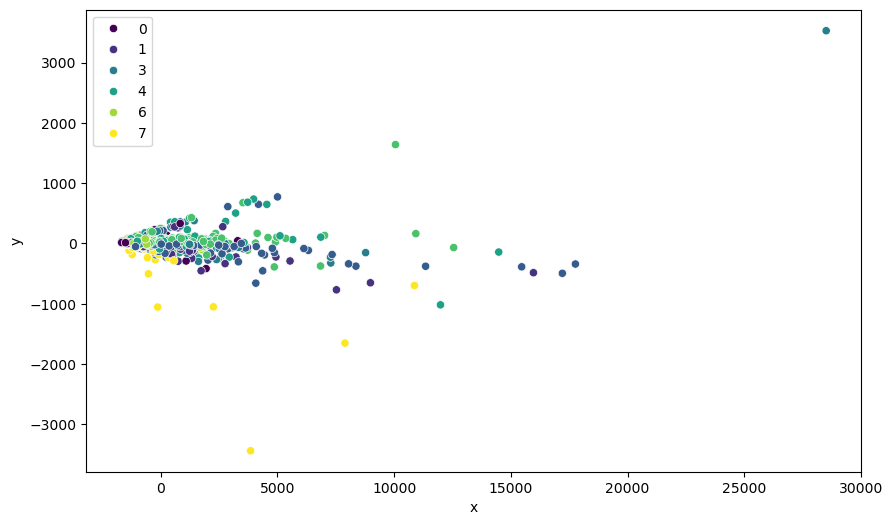

In [32]:
plot_pca(cluster_labels_gmm)

In [33]:
import umap.umap_ as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

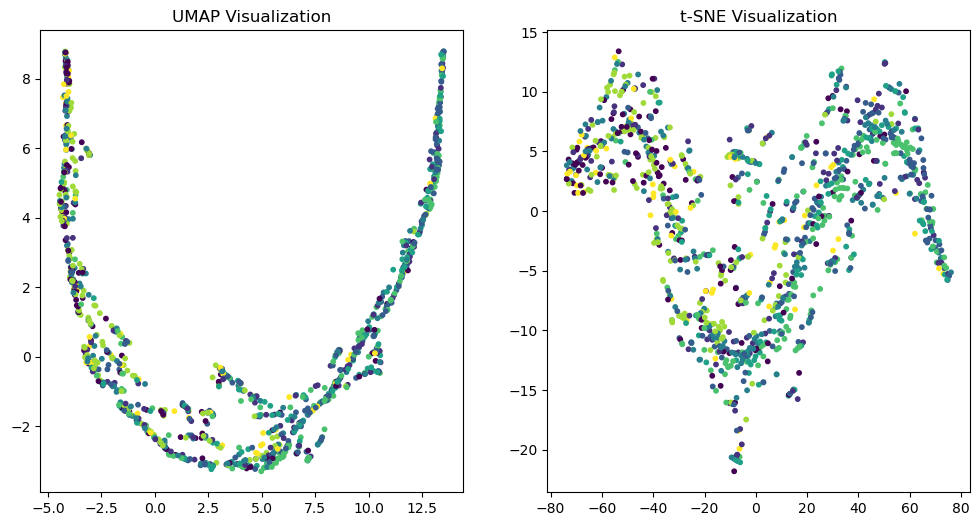

In [34]:
plot_umap_and_tsne(cluster_labels_gmm)

In [35]:
# peak_values_df.index = peak_values_df.index.round()
peak_values_df = peak_values_df[~peak_values_df.index.isin([np.nan, np.inf, -np.inf])]
peak_values_df.index = peak_values_df.index.astype(int)
# Group by the rounded age index and calculate the mean for each group
grouped_mean = peak_values_df.groupby(peak_values_df.index).mean()


grouped_mean


,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
9,190.722153,82.236063,97.484075,27.642289,312.308090,228.290786,359.993535,170.447952,439.815154,171.323339,...,150.238021,97.037400,17.876701,112.756492,40.328558,433.538303,400.179395,98.503814,120.916191,502.694741
18,347.971794,87.351338,NaN,28.096226,351.239207,268.792369,394.552659,170.487850,473.159574,197.808713,...,136.884692,89.982697,17.128546,97.373983,47.509155,454.944563,405.394479,117.015542,122.377976,410.591742
19,301.875159,87.157393,108.413617,27.304276,333.177526,241.131198,376.437715,175.716662,427.908814,190.980348,...,100.251548,78.662028,17.481573,88.510305,43.236017,421.489083,398.830078,124.414503,108.399142,396.169085
20,276.593665,84.342442,111.715987,26.975937,327.519150,246.565374,348.590305,168.526256,453.062674,192.181972,...,107.114311,77.428695,16.977595,98.141453,41.891438,357.405343,393.378672,115.401580,118.252438,381.009717
21,291.654708,89.089743,108.674599,27.609697,258.597316,243.639461,356.945327,171.076696,437.958701,186.072420,...,115.525394,72.874389,17.383683,87.830992,43.184285,422.147509,402.767222,110.649392,100.505095,357.352560
22,321.419942,91.547948,119.880674,28.113409,292.165813,270.351214,379.861755,174.310062,430.407060,205.611399,...,122.731253,87.437118,17.892493,91.983249,44.063305,473.221360,398.036813,116.698911,98.836022,429.322305
23,322.283154,93.052442,122.298275,27.956608,283.515666,276.748563,373.353262,168.294139,445.688545,195.270215,...,119.668286,79.944021,17.396744,97.493900,44.419059,440.156515,401.411584,115.902231,97.920162,409.957077
24,307.866470,87.708000,112.426403,27.363924,251.960881,249.894239,344.974593,165.544682,406.562898,177.010639,...,100.809564,80.996859,17.239798,92.820828,40.499843,424.068616,394.986550,106.294521,92.974798,347.512439
25,269.271372,85.111582,136.296341,27.947461,472.301105,274.504621,405.127202,183.270772,581.833053,212.291359,...,126.193032,76.304022,17.465324,94.817450,45.584061,440.434768,406.509453,127.518099,138.123825,572.484441
26,230.133204,89.692423,104.986260,28.751022,290.356235,229.480601,343.832935,168.519635,344.290644,185.011913,...,120.589549,88.081534,17.848645,93.216653,41.786340,380.270274,399.350461,120.270861,95.506211,183.983109


In [36]:
grouped_mean.columns

Index(['AAAS', 'ABCB6', 'ABCC5', 'ABCC9', 'ABCE1', 'ABHD12', 'ABHD2', 'ABHD5',
       'ABI1', 'ACAD8',
       ...
       'ZNF683', 'ZNF691', 'ZNF705A', 'ZNF707', 'ZNF713', 'ZNF746', 'ZNF786',
       'ZSCAN29', 'ZWILCH', 'ZZZ3'],
      dtype='object', length=1145)

In [37]:
grouped_mean.T.dropna(axis=1)

,9,19,24,26,27,28,44,48,56,66,67
AAAS,190.722153,301.875159,307.866470,230.133204,283.382215,272.903151,288.711856,268.300252,385.811650,309.369249,279.361031
ABCB6,82.236063,87.157393,87.708000,89.692423,88.756865,84.673077,89.257449,84.252743,93.151968,93.997134,99.537035
ABCC5,97.484075,108.413617,112.426403,104.986260,111.453883,113.520149,114.237891,105.710866,127.555840,103.792073,97.493154
ABCC9,27.642289,27.304276,27.363924,28.751022,28.106953,27.409885,27.249417,28.102519,29.141847,28.581135,28.982981
ABCE1,312.308090,333.177526,251.960881,290.356235,309.205227,288.976560,314.347361,350.375257,368.070678,337.314353,280.191557
...,...,...,...,...,...,...,...,...,...,...,...
ZNF746,433.538303,421.489083,424.068616,380.270274,470.706167,423.145679,430.452278,439.073393,483.049968,474.028878,464.232032
ZNF786,400.179395,398.830078,394.986550,399.350461,367.947187,390.638479,399.970552,385.862942,411.846274,358.728903,390.013135
ZSCAN29,98.503814,124.414503,106.294521,120.270861,118.920015,106.636154,106.091952,128.627497,126.517015,127.561279,122.826779
ZWILCH,120.916191,108.399142,92.974798,95.506211,99.080484,97.533860,111.574794,119.343469,119.383541,101.641989,133.133886


In [38]:
grouped_mean = grouped_mean.drop(index = 9)
grouped_mean.head(2)

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,347.971794,87.351338,NaN,28.096226,351.239207,268.792369,394.552659,170.487850,473.159574,197.808713,...,136.884692,89.982697,17.128546,97.373983,47.509155,454.944563,405.394479,117.015542,122.377976,410.591742
19,301.875159,87.157393,108.413617,27.304276,333.177526,241.131198,376.437715,175.716662,427.908814,190.980348,...,100.251548,78.662028,17.481573,88.510305,43.236017,421.489083,398.830078,124.414503,108.399142,396.169085


In [39]:
grouped_mean = grouped_mean.fillna(grouped_mean.shift(axis=0))

In [42]:
#grouped_mean = grouped_mean.drop(index = 70)
grouped_mean.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,347.971794,87.351338,NaN,28.096226,351.239207,268.792369,394.552659,170.487850,473.159574,197.808713,...,136.884692,89.982697,17.128546,97.373983,47.509155,454.944563,405.394479,117.015542,122.377976,410.591742
19,301.875159,87.157393,108.413617,27.304276,333.177526,241.131198,376.437715,175.716662,427.908814,190.980348,...,100.251548,78.662028,17.481573,88.510305,43.236017,421.489083,398.830078,124.414503,108.399142,396.169085
20,276.593665,84.342442,111.715987,26.975937,327.519150,246.565374,348.590305,168.526256,453.062674,192.181972,...,107.114311,77.428695,16.977595,98.141453,41.891438,357.405343,393.378672,115.401580,118.252438,381.009717
21,291.654708,89.089743,108.674599,27.609697,258.597316,243.639461,356.945327,171.076696,437.958701,186.072420,...,115.525394,72.874389,17.383683,87.830992,43.184285,422.147509,402.767222,110.649392,100.505095,357.352560
22,321.419942,91.547948,119.880674,28.113409,292.165813,270.351214,379.861755,174.310062,430.407060,205.611399,...,122.731253,87.437118,17.892493,91.983249,44.063305,473.221360,398.036813,116.698911,98.836022,429.322305


In [44]:
grouped_mean.index

Index([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       56, 57, 58, 59, 60, 62, 64, 65, 66, 67],
      dtype='int64')

In [52]:
#grouped_mean.loc[31] = (grouped_mean.loc[30]+grouped_mean.loc[32])/2
#grouped_mean.loc[55] = (grouped_mean.loc[54]+grouped_mean.loc[56])/2
grouped_mean.loc[61] = (grouped_mean.loc[60]+grouped_mean.loc[62])/2
grouped_mean.loc[63] = (grouped_mean.loc[62]+grouped_mean.loc[64])/2

In [53]:
# df_trans = grouped_mean.T.fillna(mean)
df_trans = grouped_mean.T

df_trans.columns = df_trans.columns.astype(int)
# Define the window size
window_size = 2

# Create an empty DataFrame to store the results

mean_window_df = pd.DataFrame(index=df_trans.T.columns)

# Loop through each age
for age in df_trans.columns:
    # Define the age range for the window
    # age = int(age)
    age_range = list(range(age - window_size, age + window_size + 1))
    age_range = [a for a in age_range if a >= df_trans.columns.min() and a <= df_trans.columns.max()]

    # age_range = age_range[(age_range >= df_trans.columns.min()) & (age_range <= df_trans.columns.max())]  # Ensure age range is within column range
    # print(age_range)
    # Calculate the mean for each CpG over the age range

    mean_values = df_trans[age_range].mean(axis=1)

    # Add the mean values to the DataFrame
    mean_window_df[age] = mean_values

# Transpose the DataFrame to have ages as rows and CpGs as columns
mean_window_df = mean_window_df.T
mean_window_df.head()

,AAAS,ABCB6,ABCC5,ABCC9,ABCE1,ABHD12,ABHD2,ABHD5,ABI1,ACAD8,...,ZNF683,ZNF691,ZNF705A,ZNF707,ZNF713,ZNF746,ZNF786,ZSCAN29,ZWILCH,ZZZ3
18,308.813539,86.283725,110.064802,27.458813,337.311961,252.162980,373.193560,171.576923,451.377021,193.657011,...,114.750183,82.024473,17.195905,94.675247,44.212203,411.279663,399.201076,118.943875,116.343185,395.923515
19,304.523831,86.985229,109.601401,27.496534,317.633300,250.032100,369.131501,171.451866,448.022441,191.760863,...,114.943986,79.736952,17.242849,92.964183,43.955224,413.996625,400.092613,116.870254,112.383663,386.280776
20,307.903054,87.897773,112.171219,27.619909,312.539802,254.095923,371.277552,172.023505,444.499365,194.530970,...,116.501439,81.276986,17.372778,92.767996,43.976840,425.841572,399.681453,116.835985,109.674134,394.889082
21,302.765326,89.037994,114.196630,27.591986,298.995094,255.687162,367.037673,171.584763,439.005159,194.023271,...,113.058158,79.269250,17.426418,92.791980,43.358821,422.883962,398.884874,116.613323,104.782572,394.762149
22,303.963588,89.148115,114.999188,27.603915,282.751765,257.439770,360.745048,169.550367,434.735976,191.229329,...,113.169761,79.736217,17.378063,93.654084,42.811586,423.399869,398.116168,112.989327,101.697703,385.030820


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

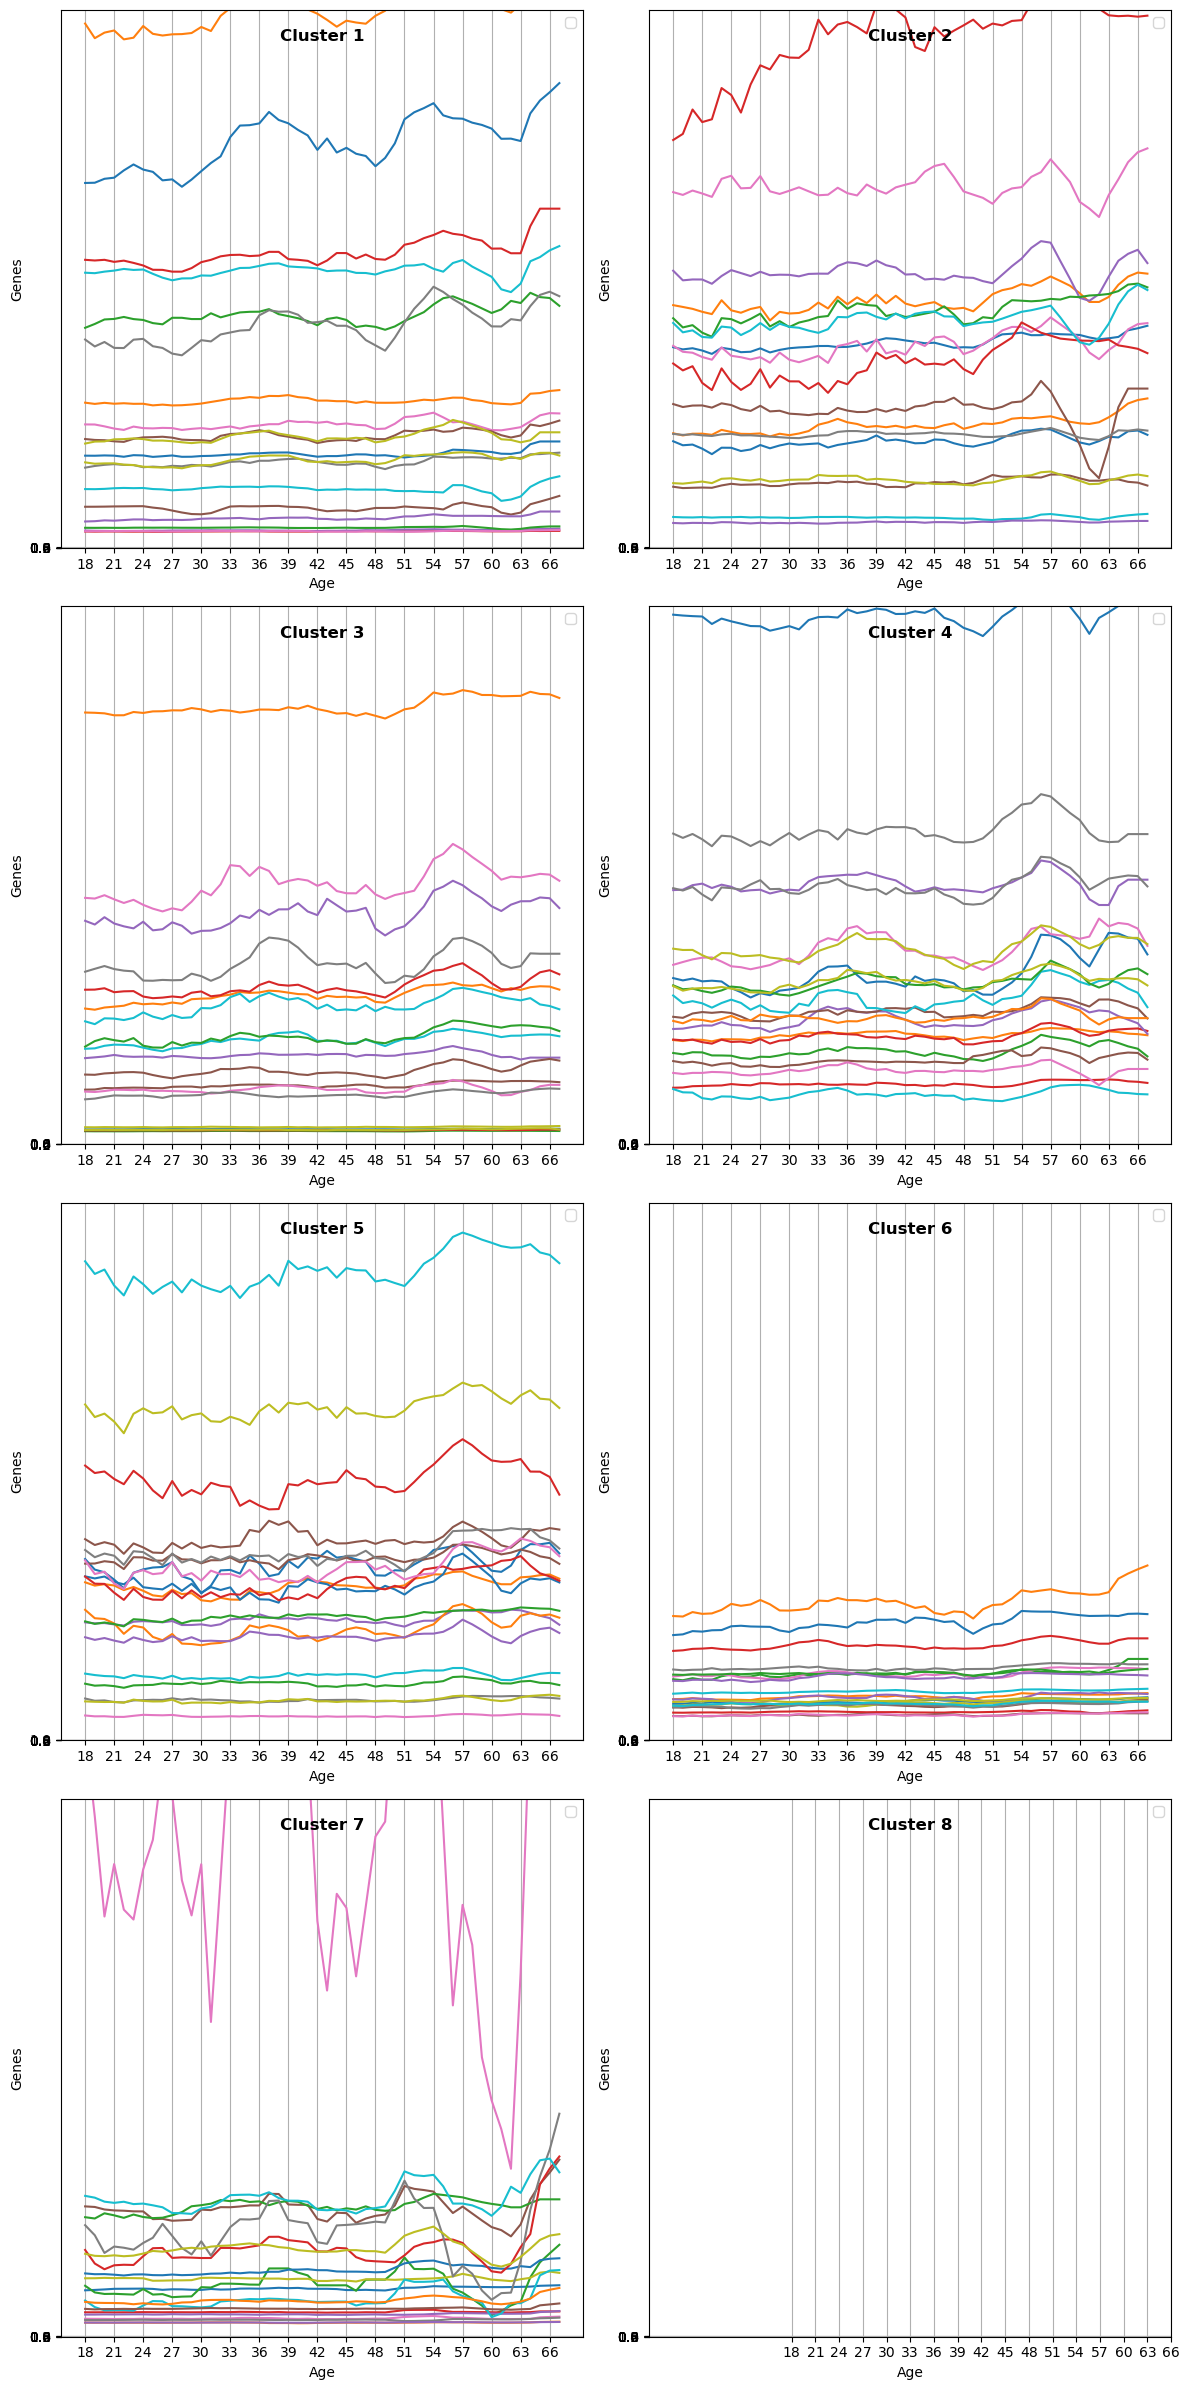

In [112]:
df_mean_for_statistics = mean_window_df.T
df_mean_for_statistics['cluster'] = cluster_labels_gmm
num_clusters = len(df_mean_for_statistics['cluster'].unique())
num_rows = num_clusters // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

if num_rows == 1:
    axs = axs.reshape(1, -1)

for cluster_id in range(1, num_clusters + 1):
    cluster_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == cluster_id]

    row_idx = (cluster_id - 1) // num_cols
    col_idx = (cluster_id - 1) % num_cols

    ax = axs[row_idx, col_idx]

    for cg_value in cluster_data.index[:20]:
        # Filter data for the current CpG site
        subset = mean_window_df[[cg_value]].sort_index()
        # Plot the scatter plot for the current CpG site
        ax.plot(subset.index, subset[cg_value], label='')#label=f'CpG={cg_value}')

    ax.set_ylim(0, 1000)

    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_xticks(np.arange(18, 67, 3))

    ax.set_xlabel('Age')
    ax.set_ylabel('Genes')
    ax.grid(True)
    ax.legend(loc='upper right')
    ax.text(0.5, 0.95, f'Cluster {cluster_id}', ha='center', va='center', transform=ax.transAxes, fontsize=12, fontweight='bold')


plt.tight_layout()
plt.savefig('cluster_plot2_male.png')
plt.show()

In [55]:
df_mean_for_statistics.head()

,18,19,20,21,22,23,24,25,26,27,...,62,64,65,66,67,31,55,61,63,cluster
AAAS,308.813539,304.523831,307.903054,302.765326,303.963588,302.499129,290.194828,282.587283,272.711282,280.726709,...,362.149713,391.579891,384.249756,382.085099,352.845113,290.888010,348.353549,330.360860,392.908383,4
ABCB6,86.283725,86.985229,87.897773,89.037994,89.148115,89.301943,89.422479,88.864262,87.188389,88.188926,...,92.342501,93.136890,94.682749,95.178684,95.708151,88.757378,93.468612,92.090233,92.699010,7
ABCC5,110.064802,109.601401,112.171219,114.196630,114.999188,119.915258,119.177591,117.492232,115.736607,119.051076,...,112.572080,117.326856,115.163702,115.101082,112.628294,113.383828,115.737009,112.099127,118.230227,0
ABCC9,27.458813,27.496534,27.619909,27.591986,27.603915,27.798220,28.026485,28.025194,27.915849,28.176639,...,28.068643,28.371935,28.598749,28.694654,28.732420,28.158873,28.401743,28.045111,28.225490,3
ABCE1,337.311961,317.633300,312.539802,298.995094,282.751765,311.708156,318.059940,321.467823,322.560001,331.513429,...,325.045736,364.959368,364.633127,367.326146,347.801749,287.734927,357.705470,313.451913,353.861050,5


# Ходим по кластерам

## 7 кластер

In [103]:
cluster_7_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 7].index.tolist()

print("Genes in Cluster 7:")
print(cluster_7_genes)

Genes in Cluster 7:
['ABCB6', 'ATRNL1', 'B3GNT5', 'BOLL', 'CDH6', 'CDKN1A', 'CETN1', 'CNKSR3', 'DOCK5', 'EMP1', 'ENTPD7', 'EPAS1', 'EPHA1', 'EREG', 'ESRRG', 'FAM124A', 'HBB', 'HBD', 'HBM', 'HK2', 'INSL5', 'KCNH6', 'LILRB4', 'LTBR', 'LUM', 'LYZ', 'MAGEA11', 'MAMLD1', 'MARCKS', 'MXD1', 'NAALAD2', 'NR4A3', 'PAPSS2', 'PERP', 'PID1', 'PLSCR4', 'RAI14', 'RAPH1', 'RGS13', 'RP1', 'RP2', 'SAMSN1', 'SERPINB2', 'SPAG9', 'ST8SIA3', 'STK38L', 'SYAP1', 'TFPI', 'TGIF1', 'TGM2', 'THBD', 'THBS1', 'TIMP1', 'TLR2', 'TLR4', 'TMEM38A', 'TMEM51', 'TOM1', 'VMO1', 'WIPI1', 'ZBTB43']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


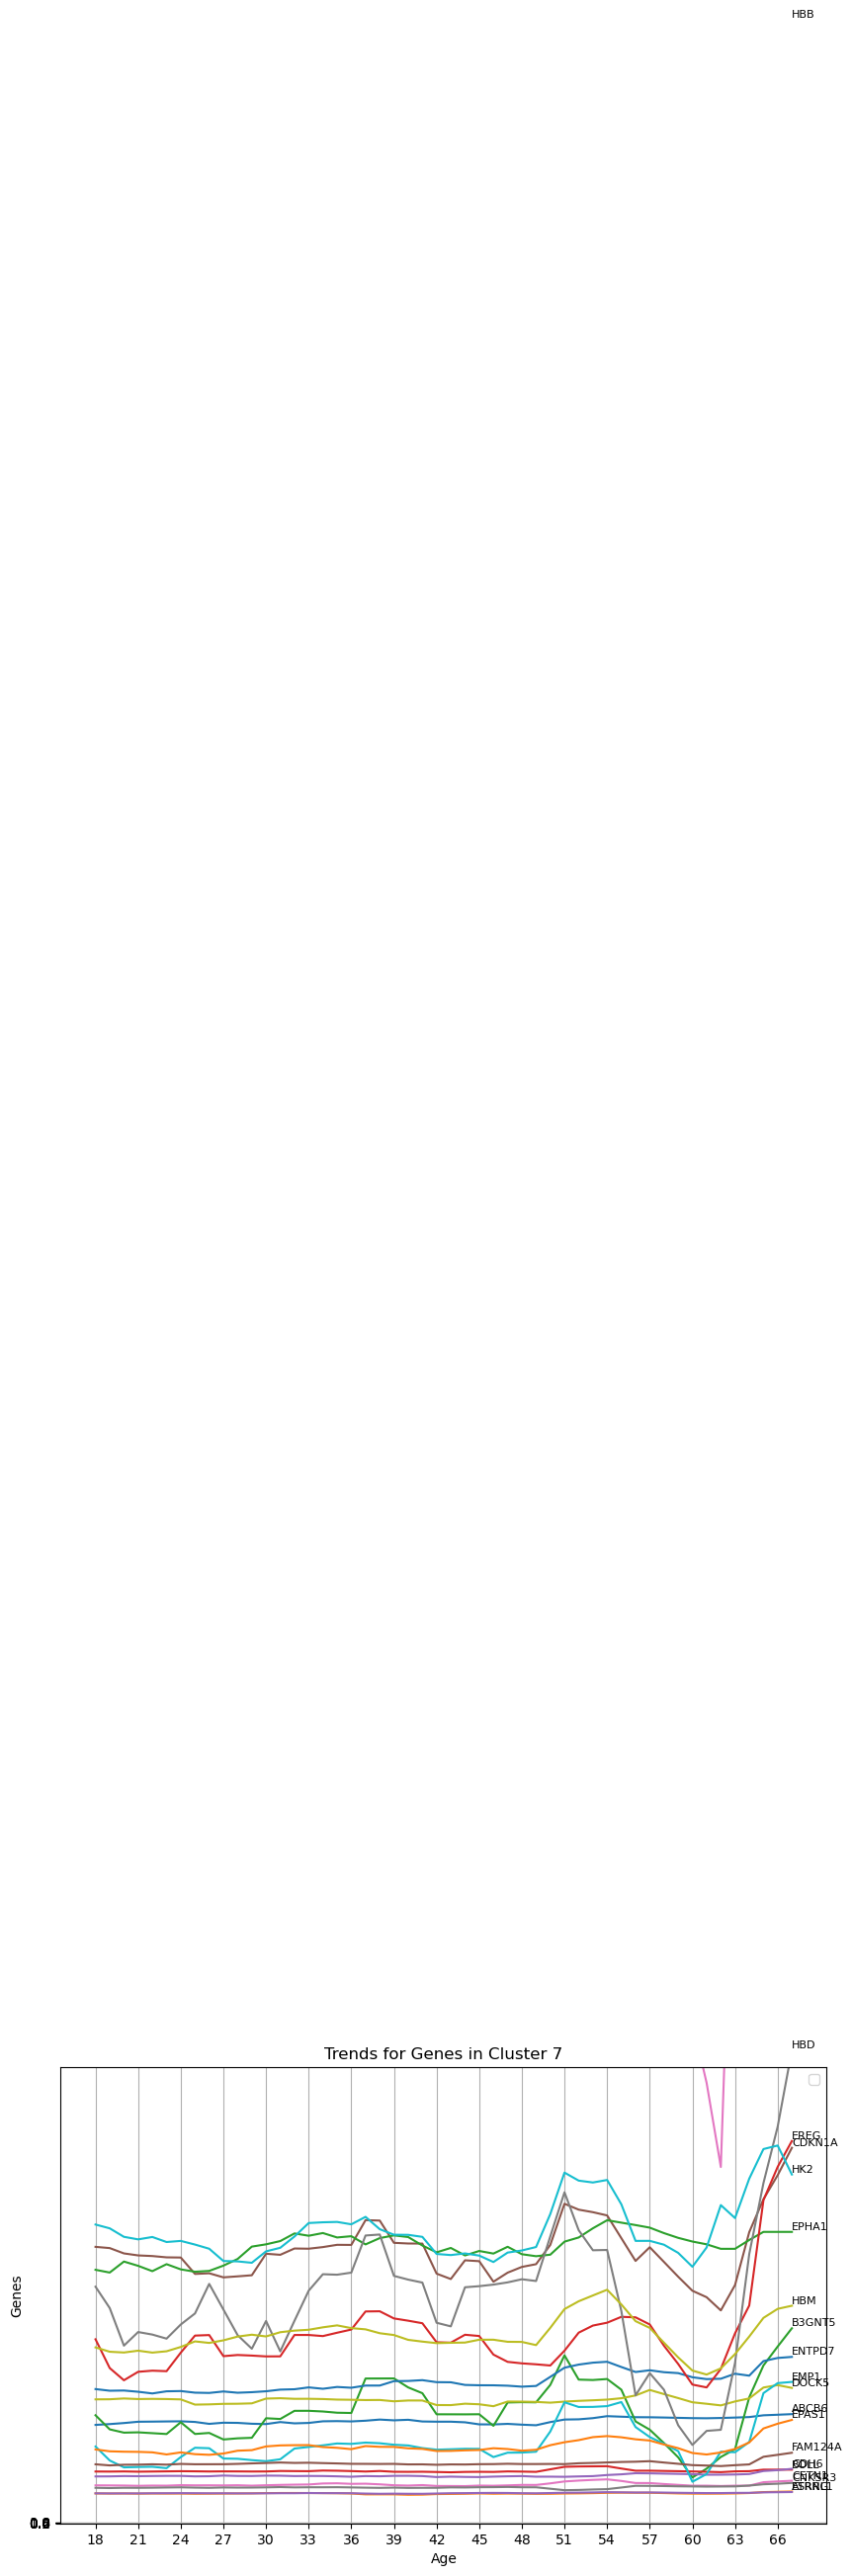

In [104]:
cluster_7_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 7]

plt.figure(figsize=(10, 6))

for gene_name in cluster_7_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 1.1, 0.2))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 7')

plt.show()


['ABCB6', 'B3GNT5', 'BOLL', 'CDKN1A', 'CETN1', 'CNKSR3', 'DOCK5', 'EMP1', 'ENTPD7', 'EPAS1', 'EPHA1', 'EREG', 'FAM124A', 'HBB', 'HBD', 'HBM', 'HK2', 'INSL5', 'LILRB4', 'LTBR', 'LUM', 'MAGEA11', 'MAMLD1', 'MARCKS', 'MXD1', 'NAALAD2', 'NR4A3', 'PAPSS2', 'PERP', 'PID1', 'PLSCR4', 'RAPH1', 'RGS13', 'RP2', 'SAMSN1', 'SERPINB2', 'SPAG9', 'STK38L', 'SYAP1', 'TFPI', 'TGIF1', 'TGM2', 'THBD', 'THBS1', 'TIMP1', 'TLR2', 'TLR4', 'TMEM51', 'TOM1', 'VMO1', 'WIPI1', 'ZBTB43']


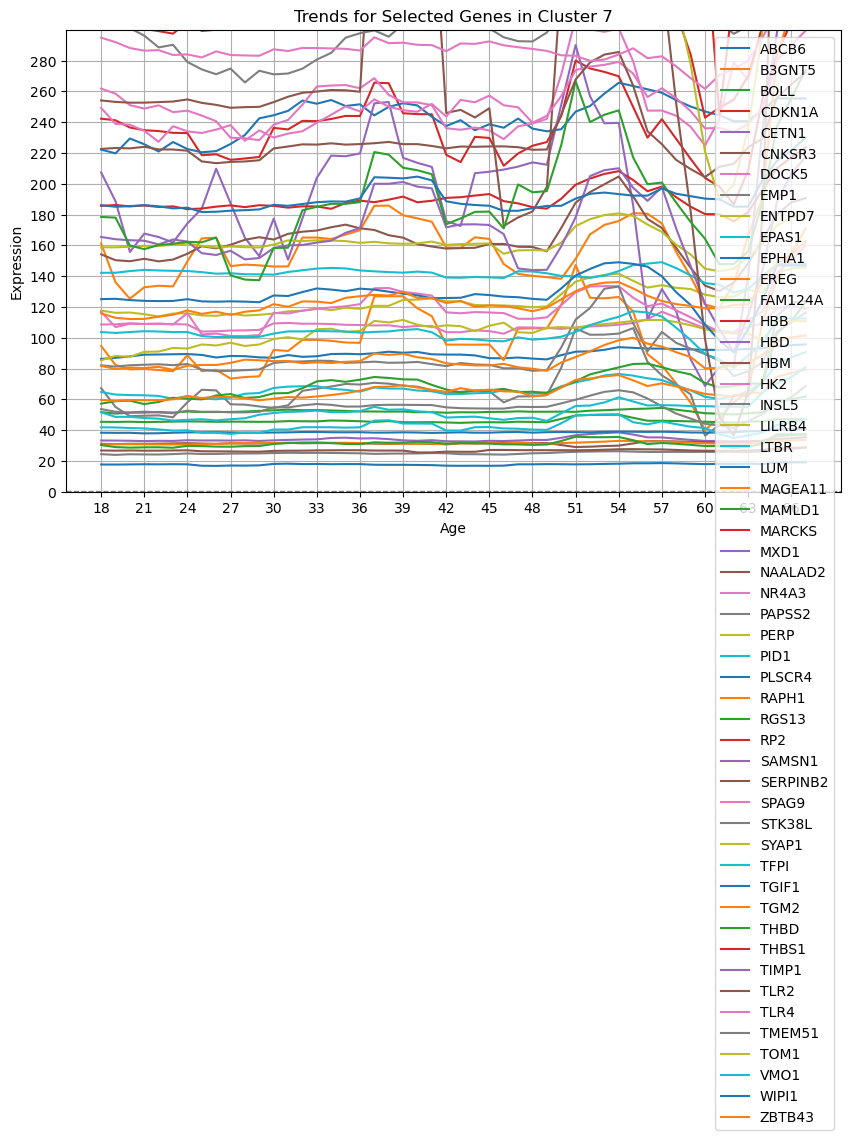

In [113]:
import matplotlib.pyplot as plt

cluster_7_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 7]

selected_genes = []

for gene_name in cluster_7_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_39 = mean_window_df.loc[35:39, gene_name].mean()
    if (mean_expression_35_to_39 / mean_expression_18_to_35) > 1.:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 7')

plt.show()


### Вывод: 
Рост наблюдается в 37 у этих генов: ABCB6', 'B3GNT5', 'BOLL', 'CDKN1A', 'CETN1', 'CNKSR3', 'DOCK5', 'EMP1', 'ENTPD7', 'EPAS1', 'EPHA1', 'EREG', 'FAM124A', 'HBB', 'HBD', 'HBM', 'HK2', 'INSL5', 'LILRB4', 'LTBR', 'LUM', 'MAGEA11', 'MAMLD1', 'MARCKS', 'MXD1', 'NAALAD2', 'NR4A3', 'PAPSS2', 'PERP', 'PID1', 'PLSCR4', 'RAPH1', 'RGS13', 'RP2', 'SAMSN1', 'SERPINB2', 'SPAG9', 'STK38L', 'SYAP1', 'TFPI', 'TGIF1', 'TGM2', 'THBD', 'THBS1', 'TIMP1', 'TLR2', 'TLR4', 'TMEM51', 'TOM1', 'VMO1', 'WIPI1', 'ZBTB43'

## 3 кластер

In [101]:
cluster_3_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3].index.tolist()

print("Genes in Cluster 3:")
print(cluster_3_genes)

Genes in Cluster 3:
['ABCC9', 'ABHD12', 'ADAM29', 'ADAM32', 'ADAP1', 'ADCK5', 'ADRM1', 'AIP', 'AKR1C4', 'AMDHD2', 'ARPC1B', 'ARPC5', 'ASPSCR1', 'ATG9A', 'ATP6V0E2', 'ATXN7L2', 'AUTS2', 'BATF2', 'CCDC113', 'CCDC124', 'CCDC86', 'CDH7', 'CDH9', 'CDK4', 'CENPK', 'CHAF1A', 'CHEK1', 'CHMP4A', 'CIAPIN1', 'CLDN6', 'COLEC12', 'CRYL1', 'CSRNP3', 'CUEDC2', 'CYB561D2', 'CYP4F3', 'DBNDD1', 'DCDC1', 'DCTPP1', 'DDX54', 'DOK2', 'EFEMP2', 'ENO3', 'EPHA4', 'ERBB2', 'ERCC1', 'ERH', 'ESR2', 'EXOSC1', 'FAHD2A', 'FAM118A', 'FAM32A', 'FAM47B', 'FAM89A', 'FBL', 'FBXL18', 'FHOD1', 'FOXRED2', 'FRAT1', 'GPR68', 'GZMB', 'HAGH', 'HAS3', 'HCG27', 'HDAC5', 'ICAM5', 'JMJD4', 'KERA', 'LINGO2', 'LOXL1', 'LPA', 'LPL', 'LRP5', 'LRPAP1', 'MAF', 'MAP3K14', 'MAP3K6', 'MAP7', 'MECR', 'MLF2', 'MLXIPL', 'MOAP1', 'MRPL2', 'MRPL22', 'MRPS7', 'MTHFD2L', 'MYO15B', 'NDUFA13', 'NOSIP', 'NPTN', 'NR1H3', 'NR2E1', 'NR2F2', 'NRSN2', 'NUBP2', 'OBSCN', 'OR51M1', 'OR52E6', 'ORM1', 'ORMDL2', 'ORMDL3', 'PAFAH1B2', 'PAFAH1B3', 'PANK2', 'PATE1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


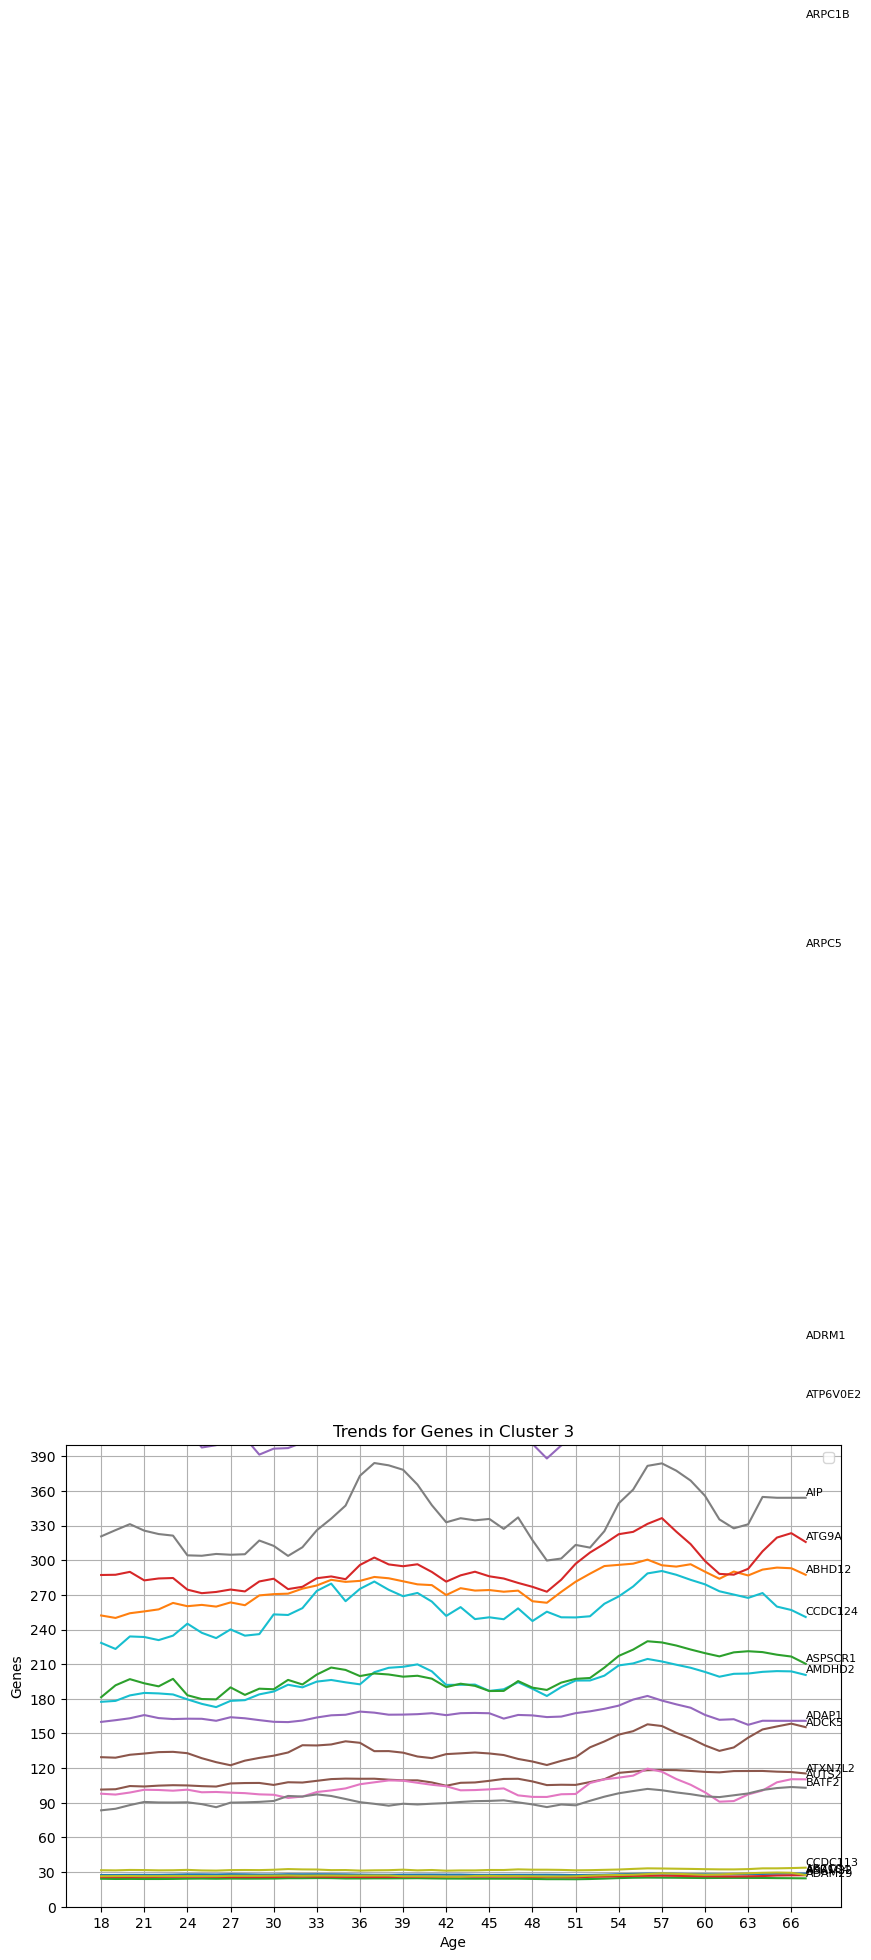

In [105]:
cluster_3_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3]

plt.figure(figsize=(10, 6))

for gene_name in cluster_3_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 30))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 3')

plt.show()


['AIP', 'CCDC124', 'CENPK', 'DCTPP1', 'EPHA4', 'ERH', 'EXOSC1', 'FBL', 'GPR68', 'HDAC5', 'LRPAP1', 'MAP3K14', 'MRPL2', 'ORMDL2', 'PCBD1', 'PCNA', 'PHPT1', 'RPUSD2', 'SH2D2A', 'SH2D3C', 'TMEM199', 'UBE2T']


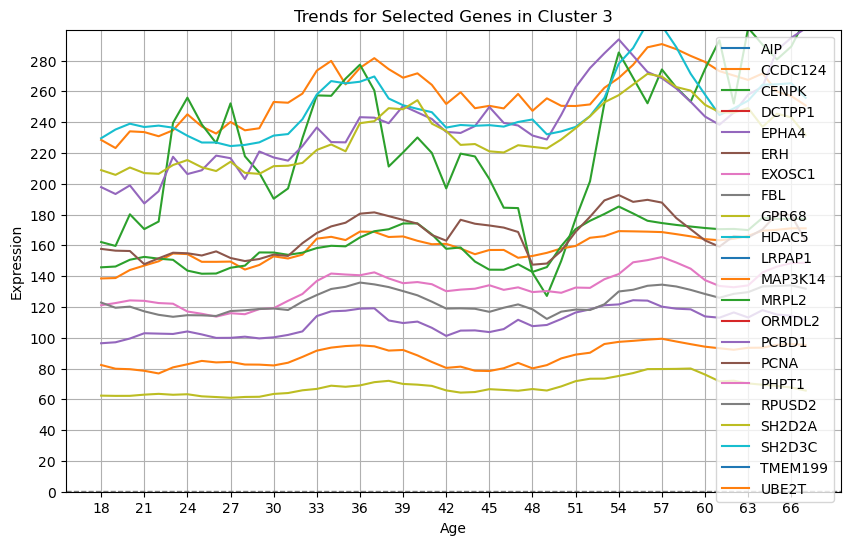

In [107]:
import matplotlib.pyplot as plt

cluster_3_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 3]

selected_genes = []

for gene_name in cluster_3_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_39 = mean_window_df.loc[35:39, gene_name].mean()
    if (mean_expression_35_to_39 / mean_expression_18_to_35) > 1.1:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 3')

plt.show()


### Вывод:
Видны заметные переходы у мужчин в период 37-42 кода в генах 'AIP', 'CCDC124', 'CENPK', 'DCTPP1', 'EPHA4', 'ERH', 'EXOSC1', 'FBL', 'GPR68', 'HDAC5', 'LRPAP1', 'MAP3K14', 'MRPL2', 'ORMDL2', 'PCBD1', 'PCNA', 'PHPT1', 'RPUSD2', 'SH2D2A', 'SH2D3C', 'TMEM199', 'UBE2T'

## 4 кластер 

In [108]:
cluster_4_genes = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4].index.tolist()

print("Genes in Cluster 4:")
print(cluster_4_genes)

Genes in Cluster 4:
['AAAS', 'ACAD8', 'ACD', 'ACOT8', 'ALG1', 'ALG12', 'APH1A', 'ARHGAP30', 'ASXL1', 'ATF7', 'BRD2', 'BRD3', 'BSDC1', 'CCDC120', 'CCDC69', 'CDK2', 'CDK5', 'CHD3', 'CLPTM1L', 'CMC1', 'COQ9', 'CTDSP2', 'DNAJA3', 'DNAJC18', 'DPP3', 'DPP9', 'ENO2', 'EPHB6', 'EPHX2', 'ERCC2', 'ERCC3', 'ERI3', 'ETFA', 'FMNL3', 'GNPDA1', 'GOLPH3', 'HCLS1', 'HDAC1', 'HDAC6', 'HDLBP', 'HGSNAT', 'HK1', 'HTT', 'HUWE1', 'KIF21B', 'KRI1', 'KRT73', 'LAMP3', 'LAP3', 'LAT', 'LHPP', 'LIX1L', 'LMNB1', 'LRP10', 'LSS', 'LTB', 'LY9', 'MARK2', 'MED16', 'MRPL4', 'MTA1', 'NEK8', 'NFS1', 'NOL6', 'NUP214', 'OXA1L', 'P2RX4', 'PAFAH2', 'PARVG', 'PBLD', 'PBX2', 'PCK2', 'PDPR', 'PELP1', 'PIGQ', 'PIM2', 'POLDIP2', 'PPRC1', 'PSTPIP1', 'RER1', 'RGS10', 'RIPK3', 'RNF167', 'RNF26', 'RPAP1', 'SAE1', 'SAMD4B', 'SARM1', 'SCAMP2', 'SCAMP3', 'SFXN5', 'SH2D3A', 'SLC25A23', 'SLC35C2', 'SLC37A1', 'SND1', 'SNRNP200', 'SNRNP35', 'SNUPN', 'SOCS3', 'SPATS2L', 'SPEN', 'SSU72', 'TAF1C', 'TAF5L', 'TAPBPL', 'TBC1D9B', 'TESK1', 'TFAP4', 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


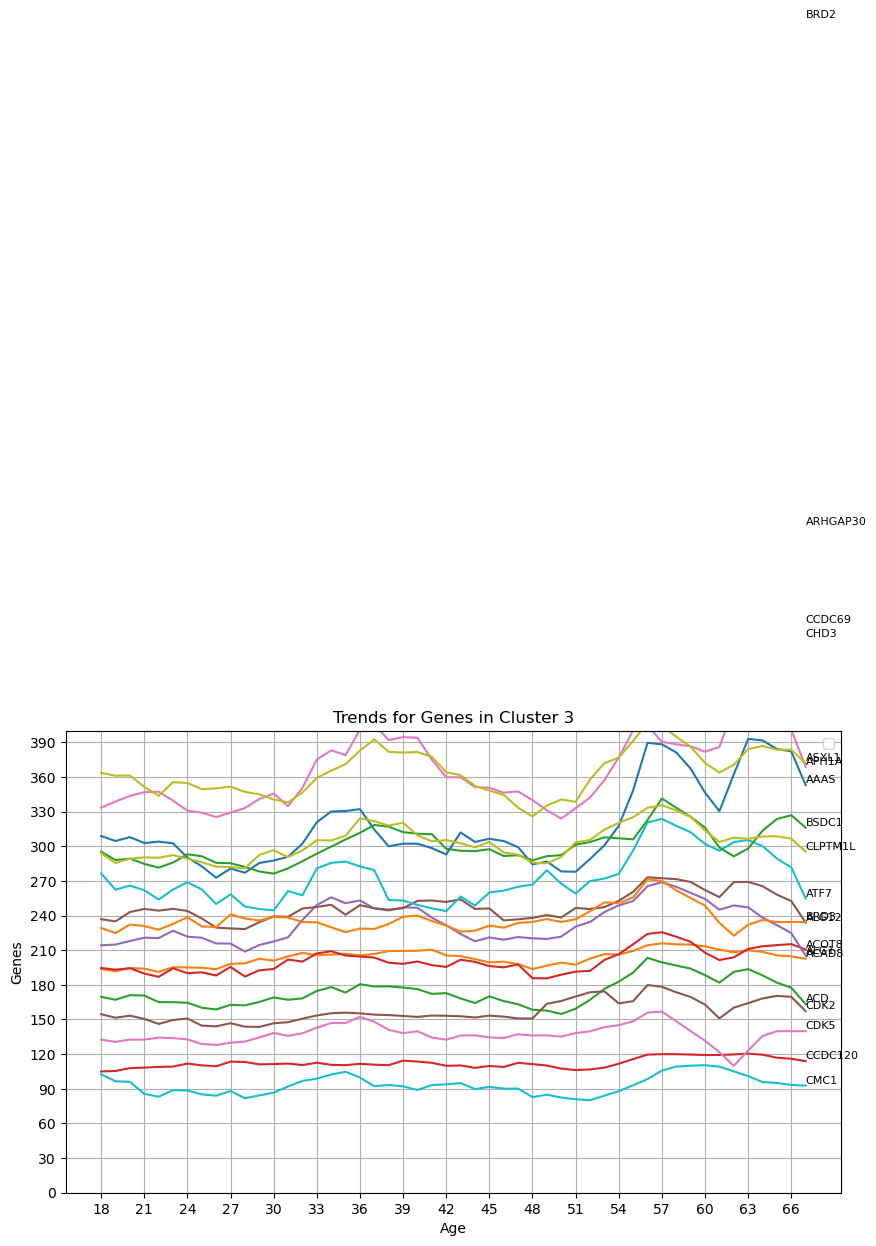

In [110]:
cluster_4_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4]

plt.figure(figsize=(10, 6))

for gene_name in cluster_4_data.index[:20]:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label='')#label=f'Gene={gene_name}')

    last_value = subset[gene_name].iloc[-1]
    plt.text(subset.index[-1], last_value, gene_name, fontsize=8, verticalalignment='bottom')


plt.xlabel('Age')
plt.ylabel('Genes')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 400, 30))
plt.ylim(0, 400)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Genes in Cluster 3')

plt.show()


['ALG1', 'APH1A', 'MED16', 'P2RX4', 'PIM2', 'POLDIP2', 'TMCO4', 'TMEM109', 'TUBB', 'USP21']


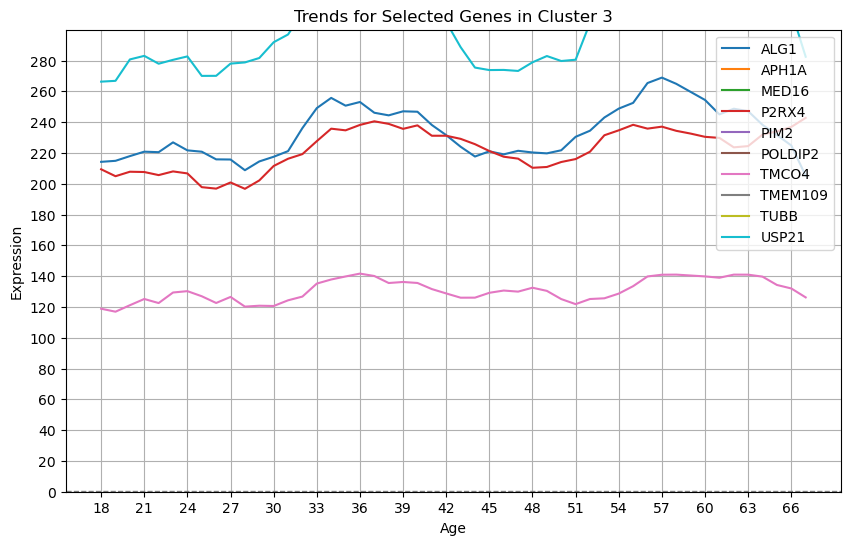

In [111]:
import matplotlib.pyplot as plt

cluster_3_data = df_mean_for_statistics[df_mean_for_statistics['cluster'] == 4]

selected_genes = []

for gene_name in cluster_3_data.index:
    mean_expression_18_to_35 = mean_window_df.loc[18:35, gene_name].mean()
    mean_expression_35_to_39 = mean_window_df.loc[35:39, gene_name].mean()
    if (mean_expression_35_to_39 / mean_expression_18_to_35) > 1.1:
        selected_genes.append(gene_name)

plt.figure(figsize=(10, 6))
for gene_name in selected_genes:
    subset = mean_window_df[[gene_name]].sort_index()
    plt.plot(subset.index, subset[gene_name], label=gene_name)


print (selected_genes)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 300, 20))
plt.ylim(0, 300)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes in Cluster 3')

plt.show()

Переход в 37 заметен и у генов 'ALG1', 'APH1A', 'MED16', 'P2RX4', 'PIM2', 'POLDIP2', 'TMCO4', 'TMEM109', 'TUBB', 'USP21']

In [ ]:
#Графие пересечения 

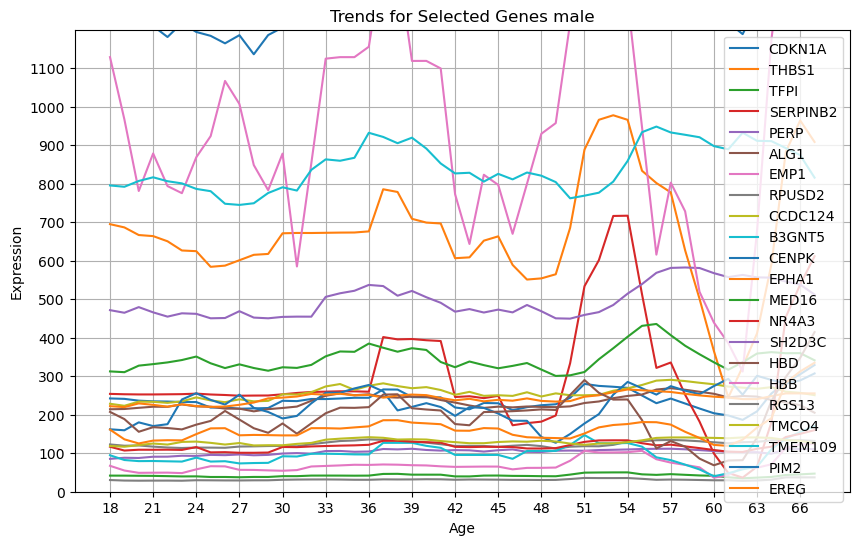

In [115]:
genes_of_interest = ['CDKN1A', 'THBS1', 'TFPI', 'SERPINB2', 'PERP', 'ALG1', 'EMP1', 'RPUSD2', 'CCDC124', 'B3GNT5', 'CENPK', 'EPHA1', 'MED16', 'NR4A3', 'SH2D3C', 'HBD', 'HBB', 'RGS13', 'TMCO4', 'TMEM109', 'PIM2', 'EREG']

plt.figure(figsize=(10, 6))

for gene_name in genes_of_interest:
    subset = mean_window_df[gene_name].sort_index()
    plt.plot(subset.index, subset.values, label=gene_name)

plt.xlabel('Age')
plt.ylabel('Expression')
plt.xticks(np.arange(18, 67, 3))
plt.yticks(np.arange(0, 1200, 100))
plt.ylim(0, 1200)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Trends for Selected Genes male')

plt.show()
